#  COVID PREDICTION PROJECT - 

# SUMMARY :-

- Analysis of the countries in the following order: 1.Afghanistan,2.India,3.China,4.US,5.Russia,6.Spain,7.Brazil,8.Italy,9.Costa Rica, 10.Ireland.
- Context in the following order:
- 1. Business case
- 2. Data collection
- 3. EDA and Visualization
- 4. Model selection, Model building and Model evaluation.
- Following context is used in the individual countries - Confirmed, recovered and deaths

# 1.BUSINESS CASE : 

- COVID-19 pandamic has ravaged the globe for almost a year now.
- This is a classical case of COVID cases reported around 266 regions around the globe.
- There are 3 aspects of categorizing people, who have been infected - Recovered, confirmed and deaths.
- The data has provided for a period of 8 months, from Jan-2020 to Sept-2020.
- The scope of this work is to predict COVID casualities for the different regions with Time series.
- In time series, we have considered ARIMA model to predict COVID cases for 10 regions for each of the three categories(Confirmed, recovered and deaths).
- The 10 regions were seledted based on their current COVID ranking in the globe.
- The 10 region are - India, China, US, Brazil, Italy, Spain, Costa Rica, Russia, Afghanistan and Ireland.

- Model used to predict : Time series - ARIMA.
- No. of regions taken   : 10



# 2.DATA COLLECTION AND PRE PROCESSING :

- Three seperate data set was provided for recovered, confirmed and deaths related to COVID-19.
- Columns such as 'province/state', 'Lat' and 'Long' were removed from the original data set provided.

In [253]:
# ALL THREE DATASET PROVIDED AS BEEN TAKEN : CONFIRMED CASES, RECOVERED CASES AND DEATHS DUE TO COVID-19 :

covid_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv').drop(['Province/State','Lat','Long'],axis=1,inplace=False)
covid_recovered = pd.read_csv('time_series_covid19_recovered_global.csv').drop(['Province/State','Lat','Long'],axis=1,inplace=False)
covid_deaths    = pd.read_csv('time_series_covid19_deaths_global.csv').drop(['Province/State','Lat','Long'],axis=1,inplace=False)
covid_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,Albania,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,Algeria,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,Andorra,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,Angola,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,Western Sahara,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,Yemen,0,0,0,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,Zambia,0,0,0,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [331]:
# IMPORTING NECESSARY PACKAGES :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import bootstrap_plot
import seaborn as sns


# 3. ANALYSIS :
- The 10 countries would be treated seperately -EDA, Visualization for the countries would be done seperately.

# 1. AFGHANISTAN :

# DATA PREPROCESSING:
- Changed the columns names respectively.
- Type casted the data to 'integers'
- Putting all 3 columns of Afghanistan data into a single dataframe.(Confirmed, recovered and deaths together).

In [254]:
covid_confirmed_Afghan = pd.DataFrame(covid_confirmed.iloc[0,1:246]).rename(columns={0:'Confirmed cases Afghan'},inplace=False)
covid_recovered_Afghan = pd.DataFrame(covid_recovered.iloc[0,1:246]).rename(columns={0:'recovered cases Afghan'},inplace=False)
covid_deaths_Afghan    = pd.DataFrame(covid_deaths.iloc[0,1:246]).rename(columns={0:'Deaths related to COVID Afghan'},inplace=False)

In [255]:
Data_Afghan = pd.concat([covid_confirmed_Afghan,covid_recovered_Afghan,covid_deaths_Afghan],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_Afghan

,Confirmed cases Afghan,recovered cases Afghan,Deaths related to COVID Afghan
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,38872,32505,1436
9/18/20,38883,32576,1437
9/19/20,38919,32576,1437
9/20/20,39044,32576,1441


# E.D.A - Exploratory data analysis - Afghanistan
- Consists of mean, max, min, count, std and quartiles.
- Looking out for data types.
- Looking out for missing values.
- Looking out for shape of the datatype.

In [256]:
print('Shape of dataset:', Data_Afghan.shape)

print('check for Nan values:', Data_Afghan.isnull().sum())

print('EDA:', pd.DataFrame(Data_Afghan.describe()))

print('datatype:',Data_Afghan.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases Afghan            0
recovered cases Afghan            0
Deaths related to COVID Afghan    0
dtype: int64
EDA:        Confirmed cases Afghan  recovered cases Afghan  \
count              244.000000              244.000000   
mean             16625.311475             9830.454918   
std              16565.067185            12342.944169   
min                  0.000000                0.000000   
25%                 40.000000                1.000000   
50%               9607.000000             1018.000000   
75%              35777.250000            24080.500000   
max              39074.000000            32576.000000   

       Deaths related to COVID Afghan  
count                      244.000000  
mean                       516.709016  
std                        574.312759  
min                          0.000000  
25%                          1.000000  
50%                        210.500000  
75%                       1195.

# Visualizations - Confirmed, deaths and recovered cases
- Line plot
- Area plot
- Density plot
- Box plot

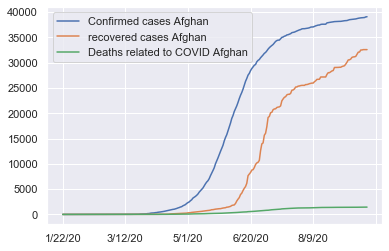

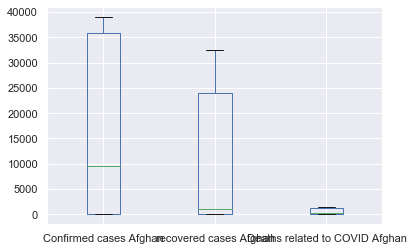

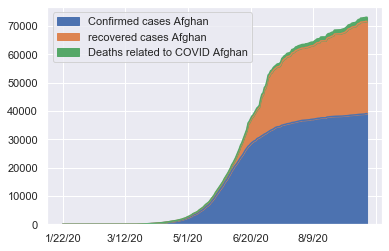

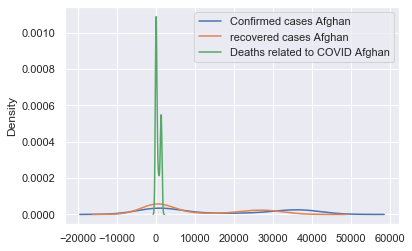

In [257]:
Data_Afghan.plot()
Data_Afghan.plot.box()
Data_Afghan.plot.area()
Data_Afghan.plot.density()


# 4. Model selection, Model building & Model evaluation:


# Time series analysis - confirmed cases - Afghanistan
- For period of Jan-2020 to Sept-2020.
- Model used for evaluation - ARIMA model.
- Stationarity is required for using ARIMA model for forcasting.

# 4.1 Checking for stationarity using ACF plots - 

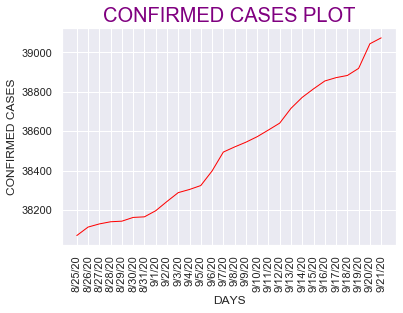

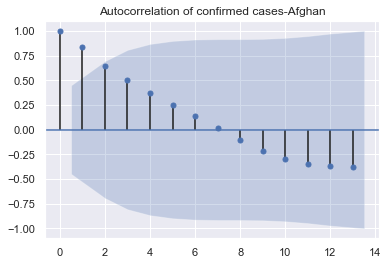

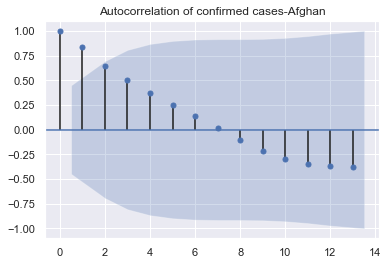

In [341]:
plt.plot(covid_confirmed_Afghan.iloc[216:246],linewidth=1,color='red') #for ease of achieving stationarity last 30 days data was taken.
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')  #Title for the plot.
plt.xlabel('DAYS')                                          #X axis label
plt.ylabel('CONFIRMED CASES')                               #Y axis label
plt.xticks(rotation=90)                                     #X ticks rotated to 90 degrees
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_confirmed_Afghan.iloc[225:245],title='Autocorrelation of confirmed cases-Afghan')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

# ARIMA Model - Confirmed cases - Afghanistan :
- The parameters were found using trail and error.
- The value found (p,d,q) is (2,2,0)
- AIC score was taken as metric for the model.
- Predicted and test were plotted, evaluation of ARIMA.

AIC SCORE: 135.47398677182997
Predictions confirmed cases: [38622.48316622 38702.24075887 38745.88232781 38794.58001167
 38872.68092352 38948.63836394 39006.92053143 39071.48664778
 39151.98426961 39230.36280785 39300.84508217 39376.9288184 ]
Test data-confirmed cases-Afghan: [[38572]
 [38606]
 [38641]
 [38716]
 [38772]
 [38815]
 [38855]
 [38872]
 [38883]
 [38919]
 [39044]
 [39074]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

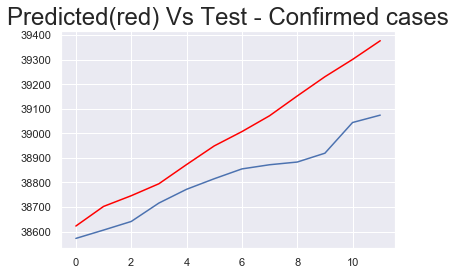

In [613]:
X_Afghan_confirmed = np.asarray(covid_confirmed_Afghan.iloc[216:246])  # DEFINING X FOR THE ARIMA MODEL....
train_Afghan_confirmed = X_Afghan_confirmed[0:16]           # MANUALLY SPLITTING DATA TO TEST AND TRAIN....
test_Afghan_confirmed = X_Afghan_confirmed[16:]             
predictions_Afghan_confirmed = []                           # PREDICTIONS
model_arima_Afghan_confirmed = ARIMA(train_Afghan_confirmed,order=(2,2,0)) 
model_arima_fit_Afghan_confirmed = model_arima_Afghan_confirmed.fit()
print('AIC SCORE:',model_arima_fit_Afghan_confirmed.aic)
predictions_Afghan_confirmed = model_arima_fit_Afghan_confirmed.forecast(steps=12)[0]  # PREDICTING DATA IN STEPS OF 12....
print('Predictions confirmed cases:',predictions_Afghan_confirmed)                       
print('Test data-confirmed cases-Afghan:',test_Afghan_confirmed)  

# MODEL EVALUATION : GRAPHICALLY - 
plt.plot(test_Afghan_confirmed)
plt.plot(predictions_Afghan_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)


# Recovered cases - Afghanistan :

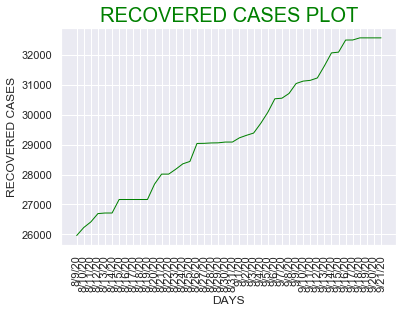

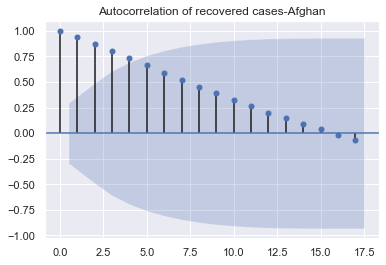

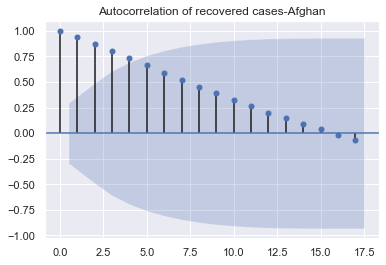

In [330]:
plt.plot(covid_recovered_Afghan.iloc[200:246],linewidth=1,color='green') #FOR THE EASE OF STATIONARIZING THE DATA LAST 46 DAYS DATA WAS TAKEN...
plt.title('RECOVERED CASES PLOT',fontsize=20,color='green')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.xticks(rotation=90)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_recovered_Afghan.iloc[200:246],title='Autocorrelation of recovered cases-Afghan')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 386.84982029733953
Predictions recovered cases: [30689.85647962 30986.06065097 31249.87978947 31580.14449629
 31772.49968324 31960.74058025 32236.55275075 32491.20569417
 32771.80785618 33019.62483625 33248.34251109 33516.738981  ]
Test data-recovered cases-Afghan: [[30715]
 [31048]
 [31129]
 [31154]
 [31234]
 [31638]
 [32073]
 [32098]
 [32503]
 [32505]
 [32576]
 [32576]
 [32576]
 [32576]]


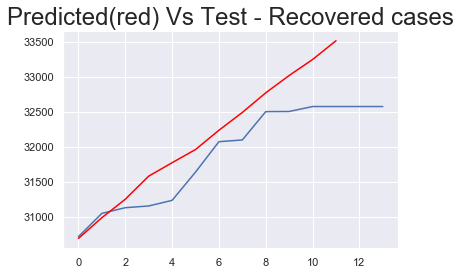

In [614]:
X_Afghan_recovered = np.asarray(covid_recovered_Afghan.iloc[200:246])  # DEFINING X FOR ARIMA......
train_Afghan_recovered = X_Afghan_recovered[0:30]                      # MANUALLY SPLITTING X INTO TRAIN AND TEST....
test_Afghan_recovered = X_Afghan_recovered[30:]
predictions_Afghan_recovered = []
model_arima_Afghan_recovered = ARIMA(train_Afghan_recovered,order=(4,2,0))
model_arima_fit_Afghan_recovered = model_arima_Afghan_recovered.fit()
print('AIC SCORE:',model_arima_fit_Afghan_recovered.aic)
predictions_Afghan_recovered = model_arima_fit_Afghan_recovered.forecast(steps=12)[0]
print('Predictions recovered cases:',predictions_Afghan_recovered)
print('Test data-recovered cases-Afghan:',test_Afghan_recovered)


# MODEL EVALUATION - GRAPHICALLY :
plt.plot(test_Afghan_recovered)
plt.plot(predictions_Afghan_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)
plt.show()


# Time series analysis - deaths - Afghanistan
- For period of Jan-2020 to Sept-2020.
- Model used for evaluation - ARIMA model.
- Stationarity is required for using ARIMA model for forcasting.

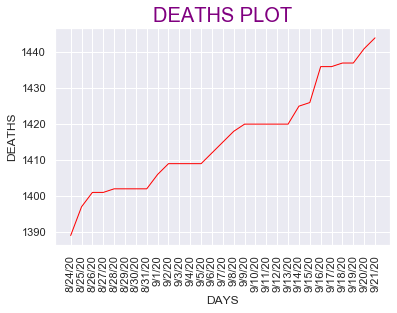

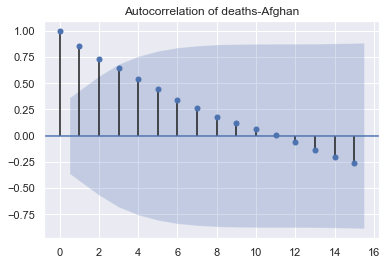

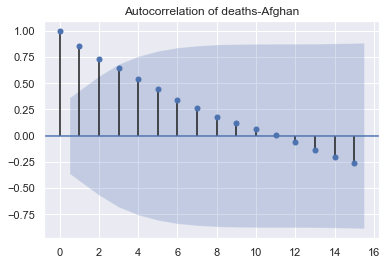

In [398]:
plt.plot(covid_deaths_Afghan.iloc[215:245],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.xticks(rotation=90)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_Afghan.iloc[215:245],title='Autocorrelation of deaths-Afghan')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 53.192594040597946
Predictions deaths: [1428.50957697 1427.7904212  1429.34460297 1429.88569568 1432.48103301
 1433.7876655 ]
Test data-deaths-Afghan: [[1436]
 [1436]
 [1437]
 [1437]
 [1441]
 [1444]]


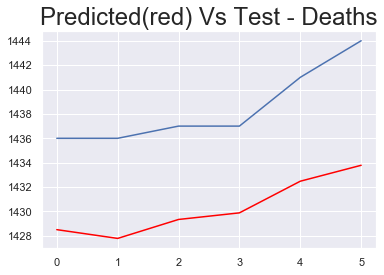

In [604]:
X_Afghan_deaths = np.asarray(covid_deaths_Afghan.iloc[225:245])
train_Afghan_deaths = X_Afghan_deaths[0:13]
test_Afghan_deaths = X_Afghan_deaths[13:]
predictions_Afghan_deaths = []
model_arima_Afghan_deaths = ARIMA(train_Afghan_deaths,order=(3,1,0))
model_arima_fit_Afghan_deaths = model_arima_Afghan_deaths.fit()
print('AIC SCORE:',model_arima_fit_Afghan_deaths.aic)
predictions_Afghan_deaths = model_arima_fit_Afghan_deaths.forecast(steps=6)[0]
print('Predictions deaths:',predictions_Afghan_deaths)
print('Test data-deaths-Afghan:',test_Afghan_deaths)

plt.plot(test_Afghan_deaths)
plt.plot(predictions_Afghan_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)
plt.show()

# 2. INDIA

In [264]:
covid_confirmed_India = pd.DataFrame(covid_confirmed.iloc[143,1:246]).rename(columns={143:'Confirmed cases India'},inplace= False)
covid_recovered_India = pd.DataFrame(covid_recovered.iloc[143,1:246]).rename(columns={143:'recovered cases India'},inplace=False)
covid_deaths_India    = pd.DataFrame(covid_deaths.iloc[143,1:246]).rename(columns={143:'Deaths related to COVID India'},inplace=False)

In [265]:
Data_India = pd.concat([covid_confirmed_India,covid_recovered_India,covid_deaths_India],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_India

,Confirmed cases India,recovered cases India,Deaths related to COVID India
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,5214677,8788,84372
9/18/20,5308014,8788,85619
9/19/20,5400619,8788,86752
9/20/20,5487580,8788,87882


In [266]:
print('Shape of dataset:', Data_India.shape)

print('check for Nan values:', Data_India.isnull().sum())

print('EDA:', pd.DataFrame(Data_India.describe()))

print('datatype:',Data_India.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases India            0
recovered cases India            0
Deaths related to COVID India    0
dtype: int64
EDA:        Confirmed cases India  recovered cases India  \
count           2.440000e+02             244.000000   
mean            9.338968e+05            2215.889344   
std             1.466931e+06            3079.311647   
min             0.000000e+00               0.000000   
25%             4.732500e+02               0.000000   
50%             1.281085e+05             777.000000   
75%             1.251126e+06            3403.000000   
max             5.487580e+06            8788.000000   

       Deaths related to COVID India  
count                     244.000000  
mean                    18285.635246  
std                     25257.583971  
min                         0.000000  
25%                         9.250000  
50%                      3797.000000  
75%                     30046.000000  
max                 

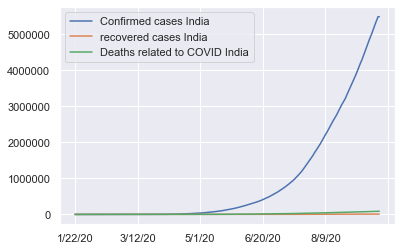

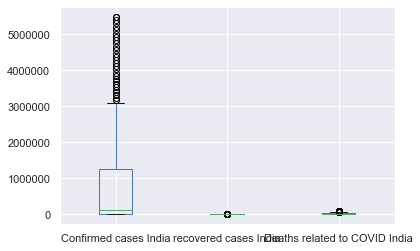

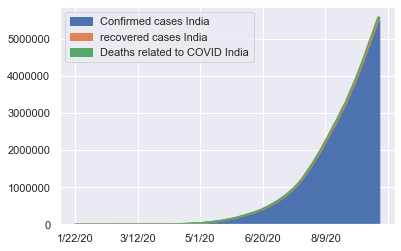

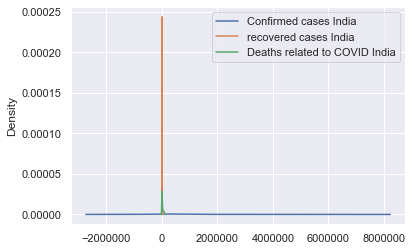

In [267]:
Data_India.plot()
Data_India.plot.box()
Data_India.plot.area()
Data_India.plot.density()

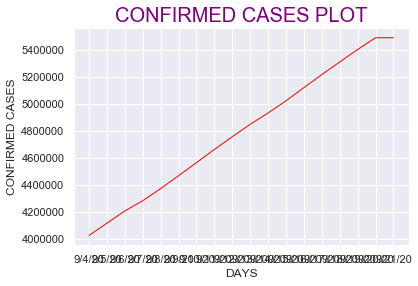

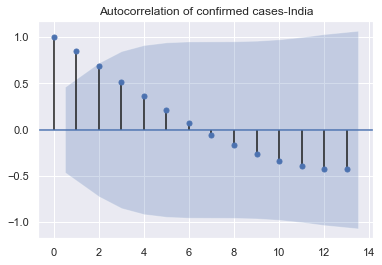

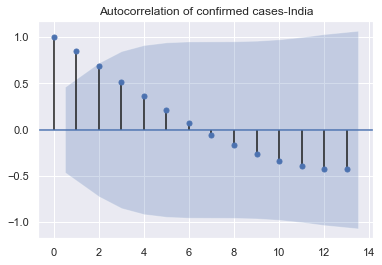

In [268]:
plt.plot(covid_confirmed_India.iloc[226:245],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_confirmed_India.iloc[226:245],title='Autocorrelation of confirmed cases-India')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 293.1827542687739
Predictions confirmed cases: [4944037.55798414 5044052.79526383 5143742.344015   5244258.68603118
 5347131.19630171 5451663.09084717 5557150.79803966 5663940.5410207 ]
Test data confirmed - India: [[4930236]
 [5020359]
 [5118253]
 [5214677]
 [5308014]
 [5400619]
 [5487580]
 [5487580]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

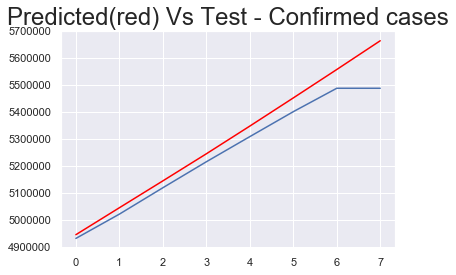

In [447]:
X_India_confirmed = np.asarray(covid_confirmed_India.iloc[220:245])
train_India_confirmed = X_India_confirmed[0:16]
test_India_confirmed = X_India_confirmed[16:]
predictions_India_confirmed = []
model_arima_India_confirmed = ARIMA(train_India_confirmed,order=(3,2,0))
model_arima_fit_India_confirmed = model_arima_India_confirmed.fit()
print('AIC SCORE:',model_arima_fit_India_confirmed.aic)
predictions_India_confirmed = model_arima_fit_India_confirmed.forecast(steps=8)[0]
print('Predictions confirmed cases:',predictions_India_confirmed)
print('Test data confirmed - India:',test_India_confirmed )

#MODEL EVALUATION - GRAPHICALLY :

plt.plot(test_India_confirmed)
plt.plot(predictions_India_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)


# Recovered cases India

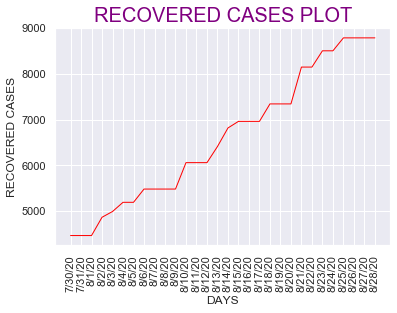

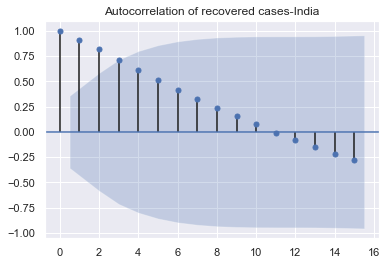

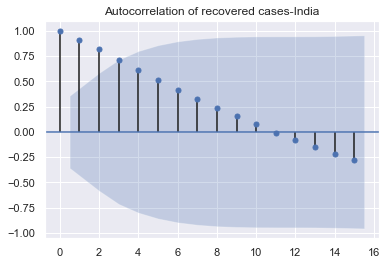

In [342]:
plt.plot(covid_recovered_India.iloc[190:220],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.xticks(rotation=90)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_recovered_India.iloc[190:220],title='Autocorrelation of recovered cases-India')


AIC SCORE: 220.2765002772726
Predictions recovered cases: [7352.76793456 7719.82024759 7858.58629085 7978.40021578 8378.97229516
 8717.53447176 8880.05353871 9090.47969657 9493.90605314 9816.69352609]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

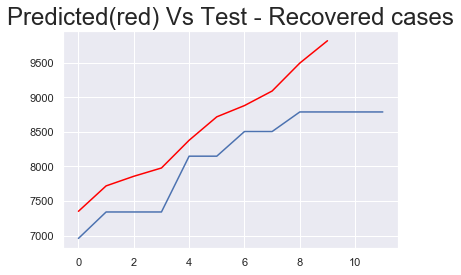

In [271]:
X_India_recovered = np.asarray(covid_recovered_India.iloc[190:220])
train_India_recovered = X_India_recovered[0:18]
test_India_recovered = X_India_recovered[18:]
predictions_India_recovered = []
model_arima_India_recovered = ARIMA(train_India_recovered,order=(4,2,0))
model_arima_fit_India_recovered = model_arima_India_recovered.fit()
print('AIC SCORE:',model_arima_fit_India_recovered.aic)
predictions_India_recovered = model_arima_fit_India_recovered.forecast(steps=10)[0]
print('Predictions recovered cases:',predictions_India_recovered)

plt.plot(test_India_recovered)
plt.plot(predictions_India_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)


# Deaths India

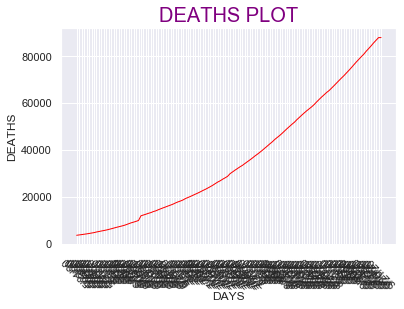

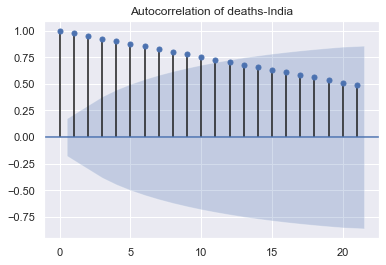

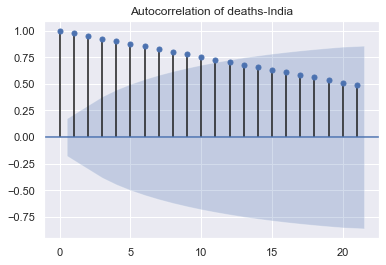

In [344]:
plt.plot(covid_deaths_India.iloc[120:245],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.xticks(rotation=135)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_India.iloc[120:245],title='Autocorrelation of deaths-India')

AIC SCORE: 1086.9625052534718
Predictions deaths cases: [44237.66476682 45110.5167738  45994.97121086 46889.23464593
 47784.71115736 48690.82323864 49601.53676983 50517.84583979
 51444.76853377 52381.4960402  53325.91963558 54279.5823856
 55243.11723322 56213.76713212 57194.87454789 58185.22799041
 59184.62374236 60192.86771297 61209.87825722 62236.14292253
 63271.12571256 64315.08368189 65368.03193826 66429.79935728
 67500.37861215 68579.86604771 69668.18956086 70765.32277477
 71871.36156281 72986.22405695 74109.93612289 75242.48586039
 76383.89032382 77534.15518449 78693.25874423 79861.22374731
 81038.04173851 82223.71028306 83418.23483045 84621.61665055
 85833.85221387 87054.94355969 88284.892136   89523.69532038
 90771.35480371]
Test data-Deaths-India: [[44386]
 [45257]
 [46091]
 [47033]
 [48040]
 [49036]
 [49980]
 [50921]
 [51797]
 [52888]
 [53866]
 [54849]
 [55794]
 [56706]
 [57542]
 [58390]
 [59357]
 [60472]
 [61529]
 [62550]
 [63498]
 [64469]
 [65288]
 [66333]
 [67376]
 [68472]

Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

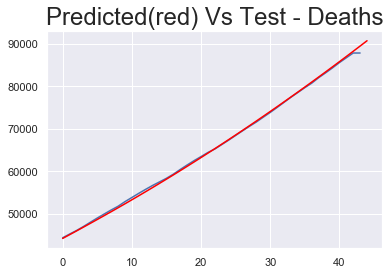

In [448]:
X_India_deaths = np.asarray(covid_deaths_India.iloc[120:245])
train_India_deaths = X_India_deaths[0:80]
test_India_deaths = X_India_deaths[80:]
predictions_India_deaths = []
model_arima_India_deaths = ARIMA(train_India_deaths,order=(15,2,1))
model_arima_fit_India_deaths = model_arima_India_deaths.fit()
print('AIC SCORE:',model_arima_fit_India_deaths.aic)
predictions_India_deaths = model_arima_fit_India_deaths.forecast(steps=45)[0]
print('Predictions deaths cases:',predictions_India_deaths)
print('Test data-Deaths-India:',test_India_deaths)

# MODEL EVALUATION - GRAPHICALLY :
plt.plot(test_India_deaths)
plt.plot(predictions_India_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

# 3. CHINA :

# DATA COLLECTION :

In [360]:
# FINDING CHINA'S INDEX :

i = covid_confirmed[covid_confirmed['Country/Region']=='China']
print(i)

# Finding the China's index in dataframe
# Index 56 to 88 are China's region.
# we take sum of them and label them under China.

   Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
56          China        1        9       15       39       60       70   
57          China       14       22       36       41       68       80   
58          China        6        9       27       57       75      110   
59          China        1        5       10       18       35       59   
60          China        0        2        2        4        7       14   
61          China       26       32       53       78      111      151   
62          China        2        5       23       23       36       46   
63          China        1        3        3        4        5        7   
64          China        4        5        8       19       22       33   
65          China        1        1        2        8       13       18   
66          China        0        2        4        9       15       21   
67          China        5        5        9       32       83      128   
68          China        

# DATA PRE PROCESSING :

In [362]:
# FOR CONFIRMED CASES:
data_confirmed1=pd.DataFrame(covid_confirmed.iloc[57:89])
data_confirmed_china=data_confirmed1.drop(['Country/Region'],axis=1,inplace=False)
Covid_confirmed_china=pd.DataFrame(data_confirmed_china.sum(axis=0))
Covid_confirmed_china=Covid_confirmed_china.rename(columns={0:'Confirmed cases China'},inplace=False).astype('int64')
Covid_confirmed_china
#FOR RECOVERED CASES:
data_recovered1=pd.DataFrame(covid_recovered.iloc[57:89])
data_recovered_china=data_recovered1.drop(['Country/Region'],axis=1,inplace=False)
Covid_recovered_china=pd.DataFrame(data_recovered_china.sum(axis=0))
Covid_recovered_china=Covid_recovered_china.rename(columns={0:'Recovered cases China'},inplace=False).astype('int64')
Covid_recovered_china
#FOR DEATHS DUE TO COVID:
data_deaths1=pd.DataFrame(covid_deaths.iloc[57:89])
data_deaths_china=data_deaths1.drop(['Country/Region'],axis=1,inplace=False)
Covid_deaths_china=pd.DataFrame(data_deaths_china.sum(axis=0))
Covid_deaths_china=Covid_deaths_china.rename(columns={0:'Deaths related to COVID China'},inplace=False).astype('int64')
Covid_deaths_china


,Deaths related to COVID China
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56
...,...
9/17/20,4730
9/18/20,4731
9/19/20,4731
9/20/20,4731


In [364]:
# Binding all 3 aspects of dataset into a single datafframe : 

Data_China = pd.concat([Covid_confirmed_china,Covid_recovered_china,Covid_deaths_china],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_China

,Confirmed cases China,Recovered cases China,Deaths related to COVID China
1/22/20,547,0,17
1/23/20,634,0,18
1/24/20,905,2,26
1/25/20,1367,3,42
1/26/20,2015,3,56
...,...,...,...
9/17/20,89303,737756,4730
9/18/20,89320,739272,4731
9/19/20,89343,752726,4731
9/20/20,89378,759388,4731


# E.D.A :

In [365]:
print('Shape of dataset:', Data_China.shape)

print('check for Nan values:', Data_China.isnull().sum())

print('EDA:', pd.DataFrame(Data_China.describe()))

print('datatype:',Data_China.dtypes)

Shape of dataset: (244, 3)
check for Nan values: Confirmed cases China            0
Recovered cases China            0
Deaths related to COVID China    0
dtype: int64
EDA:        Confirmed cases China  Recovered cases China  \
count             244.000000             244.000000   
mean            77498.155738          137220.319672   
std             19690.765594          209565.988923   
min               547.000000               0.000000   
25%             80492.250000            6580.000000   
50%             83091.500000           34578.500000   
75%             84949.750000          157246.750000   
max             89390.000000          770096.000000   

       Deaths related to COVID China  
count                     244.000000  
mean                     3830.971311  
std                      1333.549098  
min                        17.000000  
25%                      3268.000000  
50%                      4632.000000  
75%                      4642.250000  
max                 

# Visualizations - Confirmed, deaths and recovered cases
- Line plot
- Area plot
- Density plot
- Box plot

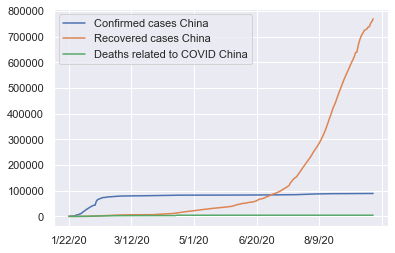

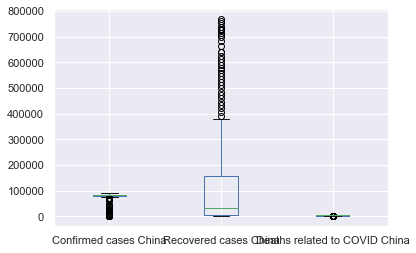

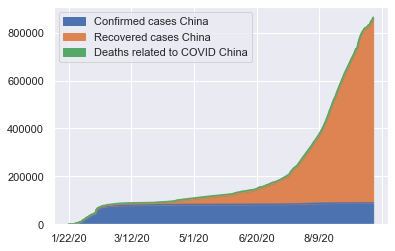

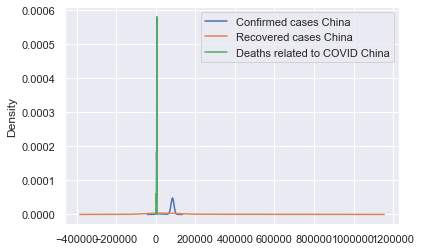

In [366]:
Data_China.plot()
Data_China.plot.box()
Data_China.plot.area()
Data_China.plot.density()

# Confirmed cases - China :

# Model selection, Model building & Model evaluation:

# Time series analysis - confirmed cases - China
- For period of Jan-2020 to Sept-2020.
- Model used for evaluation - ARIMA model.
- Stationarity is required for using ARIMA model for forcasting.

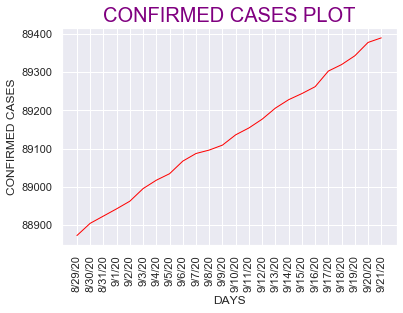

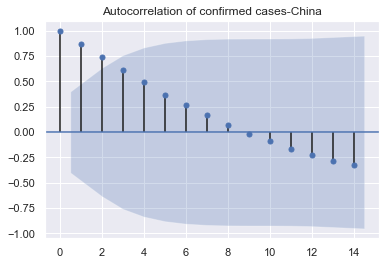

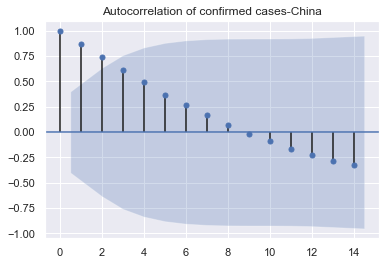

In [369]:
plt.plot(Covid_confirmed_china.iloc[220:244],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.xticks(rotation=90)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(Covid_confirmed_china.iloc[220:244],title='Autocorrelation of confirmed cases-China')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

C:\Users\R BASKARAN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


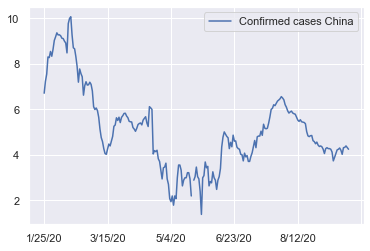

In [375]:
# PERIODS = 3, PLOT :
data_china_diff=np.log(Covid_confirmed_china.diff(periods=3))
data_china_diff

data_china_diff_1 = data_china_diff.iloc[3:]
data_china_diff_1

data_china_diff_1.plot()


AIC SCORE: 95.65699656419115
Predictions confirmed cases: [89171.25011148 89195.04815413 89217.69191865 89237.33198863
 89258.61397375 89281.02900155 89302.20325428 89323.15854617
 89344.85720481 89366.43978384]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

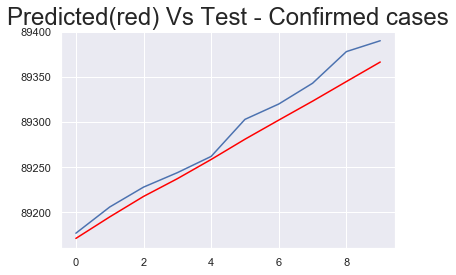

In [378]:
X_china_confirmed = np.asarray(Covid_confirmed_china.iloc[220:244])
train_china_confirmed = X_china_confirmed[0:14]
test_china_confirmed = X_china_confirmed[14:]
predictions_china_confirmed = []
model_arima_china_confirmed = ARIMA(train_china_confirmed,order=(3,1,0))
model_arima_fit_china_confirmed = model_arima_china_confirmed.fit()
print('AIC SCORE:',model_arima_fit_china_confirmed.aic)
predictions_china_confirmed = model_arima_fit_china_confirmed.forecast(steps=10)[0]
print('Predictions confirmed cases:',predictions_china_confirmed)

plt.plot(test_china_confirmed)
plt.plot(predictions_china_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)

# Recovered cases - China :

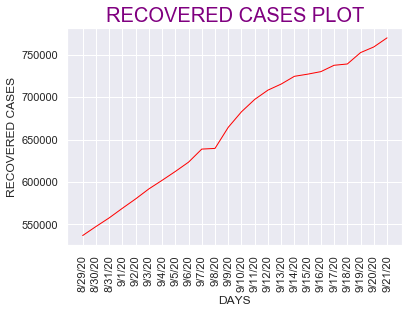

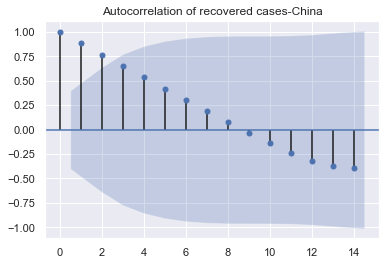

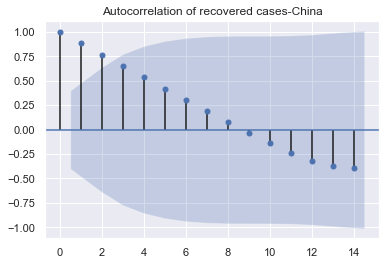

In [397]:
plt.plot(Covid_recovered_china.iloc[220:244],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.xticks(rotation=90)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

#Checking stationarity using ACF plots-

plot_acf(Covid_recovered_china.iloc[220:244],title='Autocorrelation of recovered cases-China')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 642.503043546196
Predictions recovered cases: [711274.25849092 724313.49125038 737061.96727293 749713.67680345
 762286.39426335 774835.75624915 787372.96783584 799902.98317209
 812430.84632834 824957.32576976]
test data-recovered: [[708411]
 [715582]
 [724725]
 [727259]
 [730260]
 [737756]
 [739272]
 [752726]
 [759388]
 [770096]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

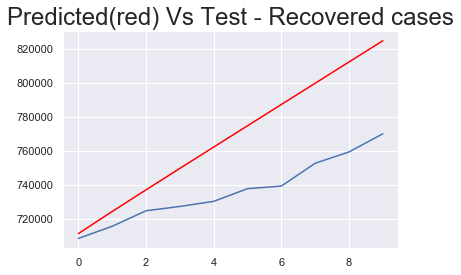

In [446]:
X_china_recovered = np.asarray(Covid_recovered_china.iloc[200:244])
train_china_recovered = X_china_recovered[0:34]
test_china_recovered = X_china_recovered[34:]
predictions_china_recovered = []
model_arima_china_recovered = ARIMA(train_china_recovered,order=(3,1,0))
model_arima_fit_china_recovered = model_arima_china_recovered.fit()
print('AIC SCORE:',model_arima_fit_china_recovered.aic)
predictions_china_recovered = model_arima_fit_china_recovered.forecast(steps=10)[0]
print('Predictions recovered cases:',predictions_china_recovered)
print('test data-recovered:',test_china_recovered )


plt.plot(test_china_recovered)
plt.plot(predictions_china_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)


# Deaths - China :

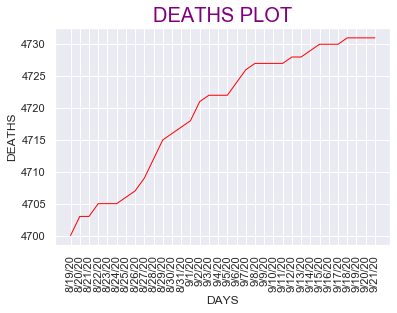

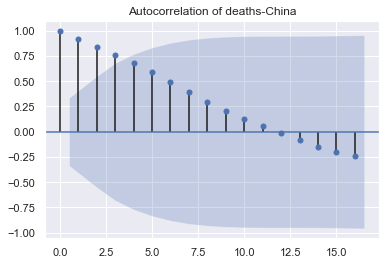

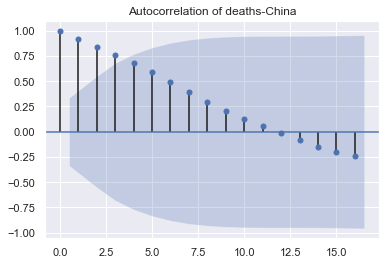

In [429]:
plt.plot(Covid_deaths_china.iloc[210:244],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.xticks(rotation=90)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(Covid_deaths_china.iloc[210:244],title='Autocorrelation of deaths-China')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

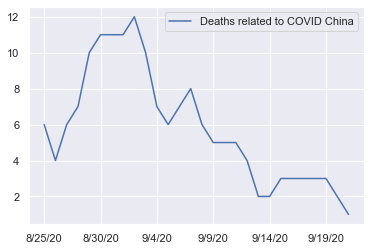

In [430]:
# PLOTTING THE DEATH DATA WITH PERIOD OF 6:

deaths_china_diff_1=Covid_deaths_china.iloc[210:244].diff(periods=6).iloc[6:]
deaths_china_diff_1.plot()

# Model building and Model evaluation : Deaths - China

AIC SCORE: 83.85375292807511
Predictions deaths cases: [4727.42098721 4728.28613806 4728.8927161  4729.7081079  4730.04488434
 4730.76715311 4731.02997935 4731.6298254  4731.8210333  4732.26760985]
test data deaths cases: [[4728]
 [4728]
 [4729]
 [4730]
 [4730]
 [4730]
 [4731]
 [4731]
 [4731]
 [4731]]


C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

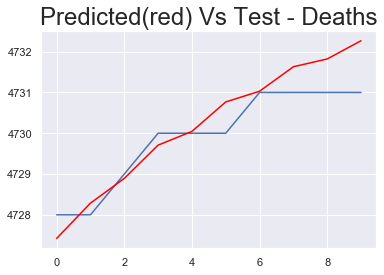

In [427]:
X_china_deaths = np.asarray(Covid_deaths_china.iloc[210:244])
train_china_deaths = X_china_deaths[0:24]
test_china_deaths = X_china_deaths[24:]
predictions_china_deaths = []
model_arima_china_deaths = ARIMA(train_china_deaths,order=(6,2,2))
model_arima_fit_china_deaths = model_arima_china_deaths.fit()
print('AIC SCORE:',model_arima_fit_china_deaths.aic)
predictions_china_deaths = model_arima_fit_china_deaths.forecast(steps=10)[0]
print('Predictions deaths cases:',predictions_china_deaths)
print('test data deaths cases:',test_china_deaths)

# Graphical Model evaluation:

plt.plot(test_china_deaths)
plt.plot(predictions_china_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

# 4. United States of America :

In [605]:
i = covid_confirmed[covid_confirmed['Country/Region']=='US']
print(i)

i = covid_recovered[covid_recovered['Country/Region']=='US']
print(i)

# Finding the India's index in dataframe
# Index 242 is US.

    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
242             US        1        1        2        2        5        5   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
242        5        5        5  ...  6485123  6520122  6553652  6592342   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
242  6630051  6674411  6723933  6768119  6804814  6856884  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
229             US        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
229        0        0        0  ...  2434658  2451406  2474570  2495127   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
229  2525573  2540334  2556465  2577446  2590671  2615949  

[1 rows x 245 columns]


In [606]:
covid_confirmed_US = pd.DataFrame(covid_confirmed.iloc[242,1:246]).rename(columns={242:'Confirmed cases US'},inplace=False)
covid_recovered_US = pd.DataFrame(covid_recovered.iloc[229,1:246]).rename(columns={229:'recovered cases US'},inplace=False)
covid_deaths_US    = pd.DataFrame(covid_deaths.iloc[242,1:246]).rename(columns={242:'Deaths related to COVID US'},inplace=False)

In [607]:
Data_US = pd.concat([covid_confirmed_US,covid_recovered_US,covid_deaths_US],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_US

,Confirmed cases US,recovered cases US,Deaths related to COVID US
1/22/20,1,0,0
1/23/20,1,0,0
1/24/20,2,0,0
1/25/20,2,0,0
1/26/20,5,0,0
...,...,...,...
9/17/20,6674411,2540334,197633
9/18/20,6723933,2556465,198570
9/19/20,6768119,2577446,199282
9/20/20,6804814,2590671,199509


# E.D.A - 

In [608]:
print('Shape of dataset:', Data_US.shape)

print('check for Nan values:', Data_US.isnull().sum())

print('EDA:', pd.DataFrame(Data_US.describe()))

print('datatype:',Data_US.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases US            0
recovered cases US            0
Deaths related to COVID US    0
dtype: int64
EDA:        Confirmed cases US  recovered cases US  Deaths related to COVID US
count        2.440000e+02        2.440000e+02                  244.000000
mean         2.229623e+06        6.950605e+05                86399.893443
std          2.217089e+06        8.178882e+05                69975.639732
min          1.000000e+00        0.000000e+00                    0.000000
25%          4.117550e+04        1.780000e+02                  714.750000
50%          1.619564e+06        3.556870e+05                99720.500000
75%          3.987295e+06        1.216454e+06               144332.500000
max          6.856884e+06        2.615949e+06               199865.000000
datatype: Confirmed cases US            int64
recovered cases US            int64
Deaths related to COVID US    int64
dtype: object


# Visualizations - Confirmed, deaths and recovered cases
- Line plot
- Area plot
- Density plot
- Box plot

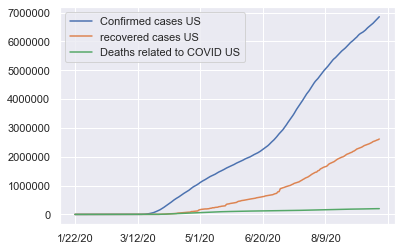

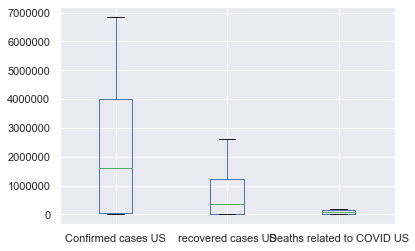

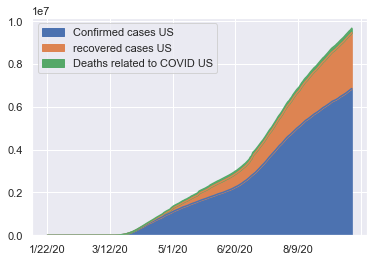

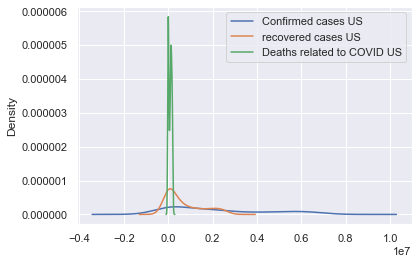

In [609]:
Data_US.plot()
Data_US.plot.box()
Data_US.plot.area()
Data_US.plot.density()

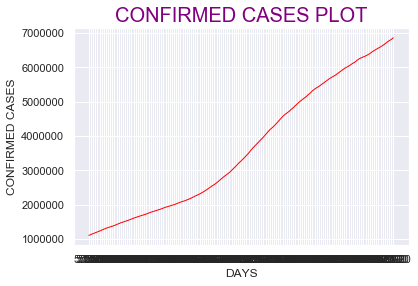

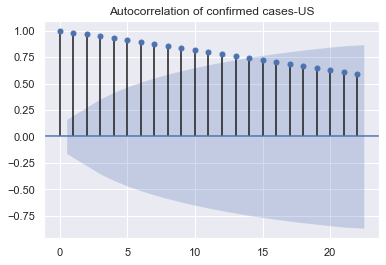

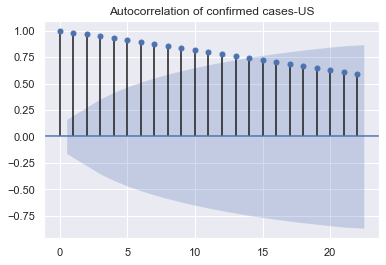

In [279]:
plt.plot(covid_confirmed_US.iloc[100:245],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_confirmed_US.iloc[100:245],title='Autocorrelation of confirmed cases-US')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 1885.9440016188223
Test data-confirmed cases-US: [[5044864]
 [5094400]
 [5141208]
 [5197411]
 [5248958]
 [5313252]
 [5361165]
 [5403213]
 [5438325]
 [5483388]
 [5529824]
 [5573847]
 [5622470]
 [5667070]
 [5701645]
 [5739536]
 [5777710]
 [5821819]
 [5867785]
 [5913941]
 [5961094]
 [5996431]
 [6030587]
 [6073840]
 [6113510]
 [6150016]
 [6200518]
 [6244970]
 [6276365]
 [6300622]
 [6327009]
 [6360212]
 [6396100]
 [6443652]
 [6485123]
 [6520122]
 [6553652]
 [6592342]
 [6630051]
 [6674411]
 [6723933]
 [6768119]
 [6804814]
 [6856884]]
Predicted-US-Confirmed: [5041771.38998499 5086585.70384738 5135758.36090361 5187371.28134857
 5241843.23468288 5297308.31437634 5347740.31021151 5390915.18573703
 5433255.46651022 5478860.19521987 5527750.58322009 5579637.09074629
 5631819.56581833 5679374.59146708 5721383.10209902 5762177.52368422
 5805473.55077082 5852334.47718064 5902151.69204462 5951885.73118031
 5997580.08610348 6038679.69148097 6078442.06413306 6120266.30173519
 6165627.39169741

Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

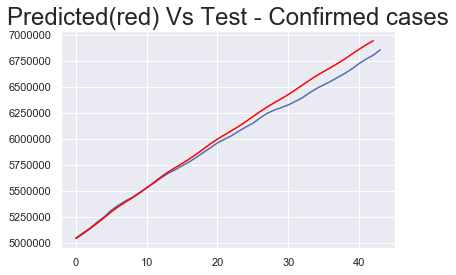

In [611]:
X_US_confirmed = np.asarray(covid_confirmed_US.iloc[100:245])
train_US_confirmed = X_US_confirmed[0:100]
test_US_confirmed = X_US_confirmed[100:]
predictions_US_confirmed = []
model_arima_US_confirmed = ARIMA(train_US_confirmed,order=(8,2,1))
model_arima_fit_US_confirmed = model_arima_US_confirmed.fit()
print('AIC SCORE:',model_arima_fit_US_confirmed.aic)
predictions_US_confirmed = model_arima_fit_US_confirmed.forecast(steps=43)[0]
print('Test data-confirmed cases-US:',test_US_confirmed )
print('Predicted-US-Confirmed:',predictions_US_confirmed )

plt.plot(test_US_confirmed)
plt.plot(predictions_US_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)

# Recovered cases - US :

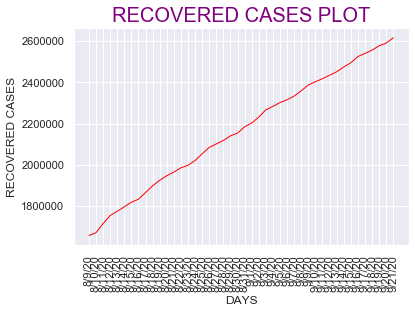

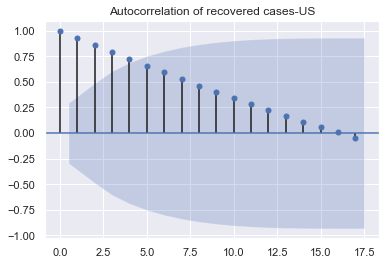

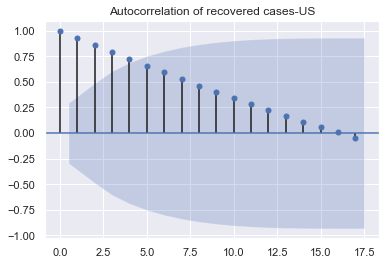

In [612]:
plt.plot(covid_recovered_US.iloc[200:245],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.xticks(rotation=90)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_recovered_US.iloc[200:245],title='Autocorrelation of recovered cases-US')


AIC SCORE: 149.54857019430415
Predictions recovered cases: [7352.76793456 7719.82024759 7858.58629085 7978.40021578 8378.97229516
 8717.53447176 8880.05353871 9090.47969657 9493.90605314 9816.69352609]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

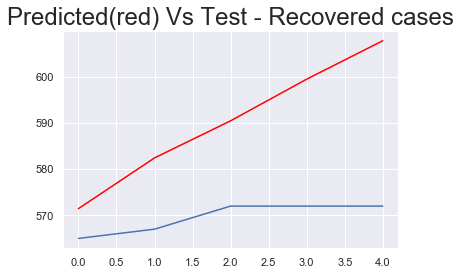

In [282]:
X_US_recovered = np.asarray(covid_recovered_US.iloc[225:245])
train_US_recovered = X_US_recovered[0:14]
test_US_recovered = X_US_recovered[14:]
predictions_US_recovered = []
model_arima_US_recovered = ARIMA(train_US_recovered,order=(2,2,0))
model_arima_fit_US_recovered = model_arima_US_recovered.fit()
print('AIC SCORE:',model_arima_fit_US_recovered.aic)
predictions_US_recovered = model_arima_fit_US_recovered.forecast(steps=5)[0]
print('Predictions recovered cases:',predictions_India_recovered)

plt.plot(test_US_recovered)
plt.plot(predictions_US_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)

# Deaths due to COVID - US

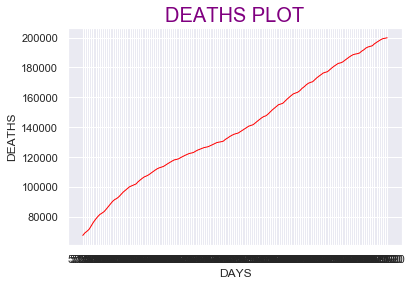

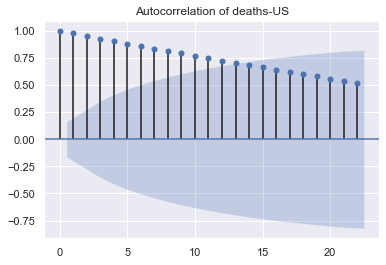

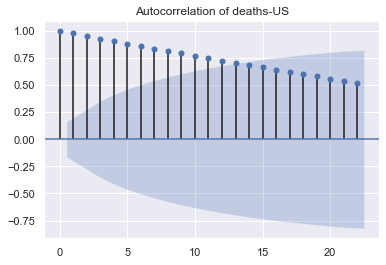

In [283]:
plt.plot(covid_deaths_US.iloc[100:245],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_US.iloc[100:245],title='Autocorrelation of deaths-US')

# Model building and Model evaluation :

AIC SCORE: 1349.902600224648
Predictions deaths cases: [162990.36040783 163694.17111707 164784.9350678  166007.08304064
 167191.45666857 168394.29208217 169362.07105846 170050.69820928
 170783.87311665 171749.45254321 172822.26319167 173945.84807826
 175052.98904643 175975.65519438 176704.01574671 177445.87057309
 178314.84606515 179285.48275525 180322.01818174 181342.03236874
 182221.15007739 182962.51128021 183690.47885546 184490.26756685
 185374.88534146 186323.73115262 187260.35669117 188095.24465767
 188826.96624048 189531.36865319 190274.36887656 191084.12632839
 191948.78971152 192807.40218249 193593.91539219 194301.2410543
 194975.27947377 195667.69479354 196409.61204422 197195.7464908
 197980.74053264 198715.20717926 199388.0262783  200026.62979657
 200670.91262637]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

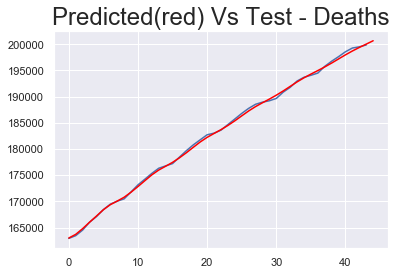

In [284]:
X_US_deaths = np.asarray(covid_deaths_US.iloc[100:245])
train_US_deaths = X_US_deaths[0:100]
test_US_deaths = X_US_deaths[100:]
predictions_US_deaths = []
model_arima_US_deaths = ARIMA(train_US_deaths,order=(5,2,1))
model_arima_fit_US_deaths = model_arima_US_deaths.fit()
print('AIC SCORE:',model_arima_fit_US_deaths.aic)
predictions_US_deaths = model_arima_fit_US_deaths.forecast(steps=45)[0]
print('Predictions deaths cases:',predictions_US_deaths)

plt.plot(test_US_deaths)
plt.plot(predictions_US_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

# 5. RUSSIA :

# DATA COLLECTION :

In [481]:
# FINDING RUSSIA'S INDEX :

i = covid_confirmed[covid_confirmed['Country/Region']=='Russia']
print(i)
i = covid_recovered[covid_recovered['Country/Region']=='Russia']
print(i)
i = covid_deaths[covid_deaths['Country/Region']=='Russia']
print(i)

# Finding the Russia's index in dataframe
# Index 208 is Russia's region-Confirmed and deaths.
# Index 195 for Russia's - Recovered

    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
208         Russia        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
208        0        0        0  ...  1053663  1059024  1064438  1069873   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
208  1075485  1081152  1086955  1092915  1098958  1105048  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
195         Russia        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
195        0        0        0  ...   871000   873684   876152   881693   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
195   887457   893145   898420   903545   906431   909026  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
208         Russia        0 

# DATA PRE PROCESSING :

In [484]:
covid_confirmed_Russia = pd.DataFrame(covid_confirmed.iloc[208,1:246]).rename(columns={208:'Confirmed cases Russia'},inplace=False)
covid_recovered_Russia = pd.DataFrame(covid_recovered.iloc[195,1:246]).rename(columns={195:'recovered cases Russia'},inplace=False)
covid_deaths_Russia    = pd.DataFrame(covid_deaths.iloc[208,1:246]).rename(columns={208:'Deaths related to COVID Russia'},inplace=False)

In [485]:
Data_Russia = pd.concat([covid_confirmed_Russia,covid_recovered_Russia,covid_deaths_Russia],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_Russia

,Confirmed cases Russia,recovered cases Russia,Deaths related to COVID Russia
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,1081152,893145,18996
9/18/20,1086955,898420,19128
9/19/20,1092915,903545,19270
9/20/20,1098958,906431,19349


# E.D.A :

In [486]:
print('Shape of dataset:', Data_Russia.shape)

print('check for Nan values:', Data_Russia.isnull().sum())

print('EDA:', pd.DataFrame(Data_Russia.describe()))

print('datatype:',Data_Russia.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases Russia            0
recovered cases Russia            0
Deaths related to COVID Russia    0
dtype: int64
EDA:        Confirmed cases Russia  recovered cases Russia  \
count            2.440000e+02              244.000000   
mean             4.068467e+05           280203.213115   
std              3.945631e+05           320048.609223   
min              0.000000e+00                0.000000   
25%              4.202500e+02               16.000000   
50%              3.311650e+05           103880.500000   
75%              7.893475e+05           573110.500000   
max              1.105048e+06           909026.000000   

       Deaths related to COVID Russia  
count                      244.000000  
mean                      6324.368852  
std                       6768.015863  
min                          0.000000  
25%                          1.000000  
50%                       3318.500000  
75%                      12762.

# Visualizations - Confirmed, deaths and recovered cases
- Line plot
- Area plot
- Density plot
- Box plot

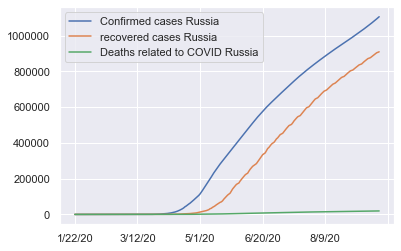

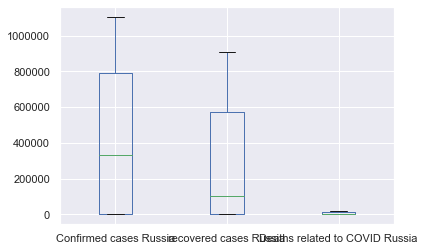

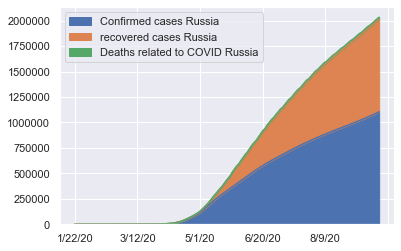

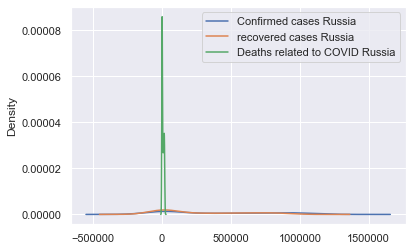

In [487]:
Data_Russia.plot()
Data_Russia.plot.box()
Data_Russia.plot.area()
Data_Russia.plot.density()

# Confirmed cases - Russia :-

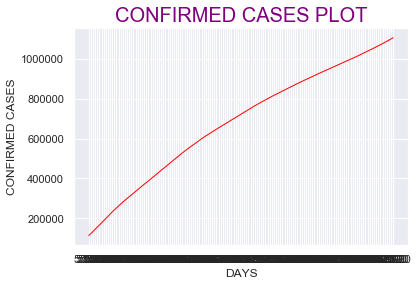

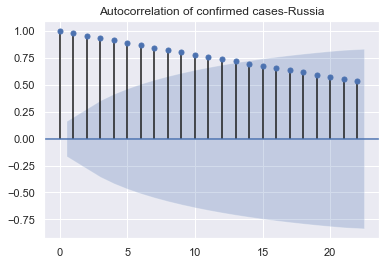

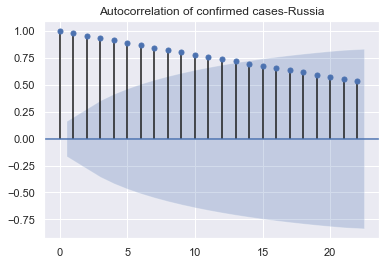

In [488]:
plt.plot(covid_confirmed_Russia.iloc[100:],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_confirmed_Russia.iloc[100:],title='Autocorrelation of confirmed cases-Russia')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 1666.7665879123688
Predictions confirmed cases: [ 982451.16037909  987154.83511237  991812.82974907  996424.07552802
 1000999.517369   1005555.93396486 1010102.14095733 1014649.67734145
 1019144.62091239 1023615.46023299 1028047.35803587 1032444.79334421
 1036803.41891623 1041134.35447555 1045439.31347856 1049719.13131852
 1053950.4569369  1058154.90141059 1062322.06111255 1066455.19620742
 1070548.28876941 1074610.916779   1078641.24598288 1082637.92335321
 1086591.39124174]
Test data-confirmed cases-Russia: [[982573]
 [987470]
 [992402]
 [997072]
 [1001965]
 [1006923]
 [1011987]
 [1017131]
 [1022228]
 [1027334]
 [1032354]
 [1037526]
 [1042836]
 [1048257]
 [1053663]
 [1059024]
 [1064438]
 [1069873]
 [1075485]
 [1081152]
 [1086955]
 [1092915]
 [1098958]
 [1105048]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

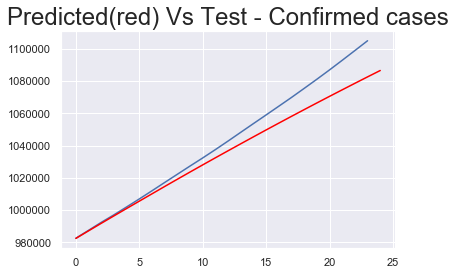

In [489]:
X_Russia_confirmed = np.asarray(covid_confirmed_Russia.iloc[100:])
train_Russia_confirmed = X_Russia_confirmed[0:120]
test_Russia_confirmed = X_Russia_confirmed[120:]
predictions_Russia_confirmed = []
model_arima_Russia_confirmed = ARIMA(train_Russia_confirmed,order=(8,2,1))
model_arima_fit_Russia_confirmed = model_arima_Russia_confirmed.fit()
print('AIC SCORE:',model_arima_fit_Russia_confirmed.aic)
predictions_Russia_confirmed = model_arima_fit_Russia_confirmed.forecast(steps=25)[0]
print('Predictions confirmed cases:',predictions_Russia_confirmed)
print('Test data-confirmed cases-Russia:',test_Russia_confirmed)

# MODEL EVALUATION - GRAPHICALLY:
plt.plot(test_Russia_confirmed)
plt.plot(predictions_Russia_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)

# Recovered cases - Russia :-

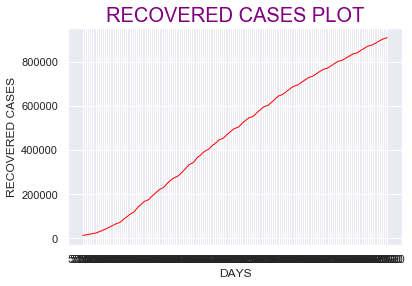

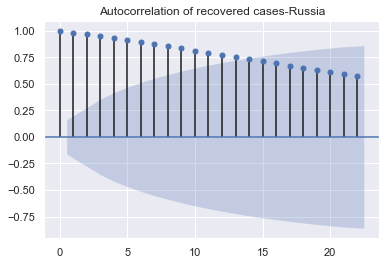

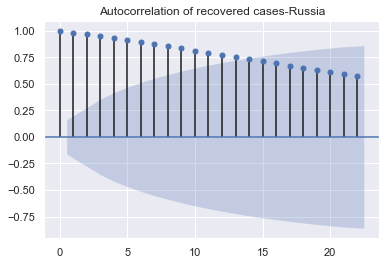

In [491]:
plt.plot(covid_recovered_Russia.iloc[100:],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_recovered_Russia.iloc[100:],title='Autocorrelation of recovered cases-Russia')

AIC SCORE: 2060.211799310424
Predictions recovered cases: [802406.82492609 806034.33940068 809268.83530493 815613.77095119
 822348.08737621 828446.34337902 834690.80156736 840625.67131882
 844712.31964561 848620.08726553 854980.00297499 861883.97350909
 868052.22099847 874474.18605996 880580.60994239 885079.38560946
 889553.9519664  896036.64683136 903037.66109007 909369.6536018
 915939.61134131 922238.99957742 927144.56051664 932105.06019448]
Test cases-recovered cases-Russia: [[802365]
 [804941]
 [807339]
 [813603]
 [819043]
 [824783]
 [830532]
 [835884]
 [838680]
 [840997]
 [847746]
 [854069]
 [859961]
 [865646]
 [871000]
 [873684]
 [876152]
 [881693]
 [887457]
 [893145]
 [898420]
 [903545]
 [906431]
 [909026]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

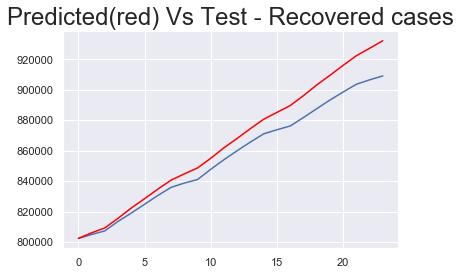

In [507]:
X_Russia_recovered = np.asarray(covid_recovered_Russia.iloc[100:])
train_Russia_recovered = X_Russia_recovered[:120]
test_Russia_recovered = X_Russia_recovered[120:]
predictions_Russia_recovered = []
model_arima_Russia_recovered = ARIMA(train_Russia_recovered,order=(8,2,0))
model_arima_fit_Russia_recovered = model_arima_Russia_recovered.fit()
print('AIC SCORE:',model_arima_fit_Russia_recovered.aic)
predictions_Russia_recovered = model_arima_fit_Russia_recovered.forecast(steps=24)[0]
print('Predictions recovered cases:',predictions_Russia_recovered)
print('Test cases-recovered cases-Russia:',test_Russia_recovered)

plt.plot(test_Russia_recovered)
plt.plot(predictions_Russia_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)

# Deaths - Russia :-

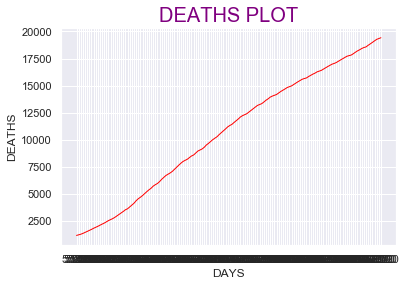

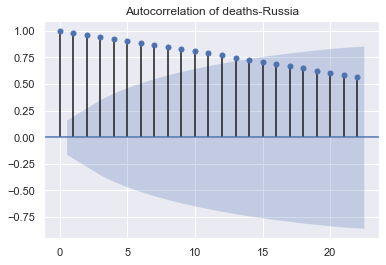

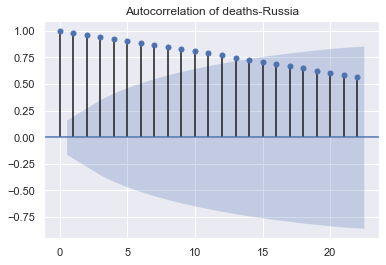

In [509]:
plt.plot(covid_deaths_Russia.iloc[100:],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_Russia.iloc[100:],title='Autocorrelation of deaths-Russia')

AIC SCORE: 1113.3896628493858
Predictions deaths cases: [16973.03264318 17062.82871307 17148.41041334 17257.17648073
 17380.87816821 17497.90109697 17609.08863835 17715.97551443
 17813.80063575 17909.49914343 18019.90869075 18142.39483416
 18261.41908926 18373.46101214 18481.86989763 18585.46125786
 18688.48376466 18801.20385229 18923.06709559 19043.17556385
 19157.09591701 19267.57150883 19375.80553019 19484.52475774]
Test data-deaths cases-Russia: [[16977]
 [17045]
 [17128]
 [17250]
 [17365]
 [17479]
 [17598]
 [17707]
 [17768]
 [17818]
 [17939]
 [18080]
 [18207]
 [18309]
 [18426]
 [18517]
 [18573]
 [18723]
 [18853]
 [18996]
 [19128]
 [19270]
 [19349]
 [19420]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

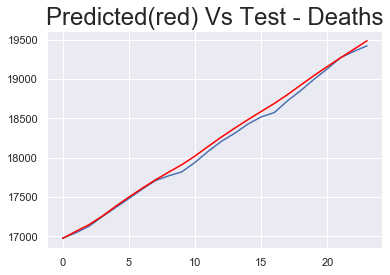

In [511]:
X_Russia_deaths = np.asarray(covid_deaths_Russia.iloc[100:])
train_Russia_deaths = X_Russia_deaths[0:120]
test_Russia_deaths = X_Russia_deaths[120:]
predictions_Russia_deaths = []
model_arima_Russia_deaths = ARIMA(train_Russia_deaths,order=(8,2,1))
model_arima_fit_Russia_deaths = model_arima_Russia_deaths.fit()
print('AIC SCORE:',model_arima_fit_Russia_deaths.aic)
predictions_Russia_deaths = model_arima_fit_Russia_deaths.forecast(steps=24)[0]
print('Predictions deaths cases:',predictions_Russia_deaths)
print('Test data-deaths cases-Russia:',test_Russia_deaths)
plt.plot(test_Russia_deaths)
plt.plot(predictions_Russia_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

# 6. Spain :-

In [492]:
# FINDING INDEX FOR SPAIN:
i = covid_confirmed[covid_confirmed['Country/Region']=='Spain']
print(i)
i = covid_recovered[covid_recovered['Country/Region']=='Spain']
print(i)
i = covid_deaths[covid_deaths['Country/Region']=='Spain']
print(i)
# Finding the Spain's index in dataframe
# Index 226 and 213 is Spain.

    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
226          Spain        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
226        0        0        0  ...   566326   566326   593730   603167   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
226   614360   625651   640040   640040   640040   671468  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
213          Spain        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
213        0        0        0  ...   150376   150376   150376   150376   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
213   150376   150376   150376   150376   150376   150376  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
226          Spain        0 

In [493]:
covid_confirmed_Spain = pd.DataFrame(covid_confirmed.iloc[226,1:246]).rename(columns={226:'Confirmed cases Spain'},inplace=False)
covid_recovered_Spain = pd.DataFrame(covid_recovered.iloc[213,1:246]).rename(columns={213:'recovered cases Spain'},inplace=False)
covid_deaths_Spain    = pd.DataFrame(covid_deaths.iloc[226,1:246]).rename(columns={226:'Deaths related to COVID Spain'},inplace=False)

In [494]:
Data_Spain = pd.concat([covid_confirmed_Spain,covid_recovered_Spain,covid_deaths_Spain],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_Spain

,Confirmed cases Spain,recovered cases Spain,Deaths related to COVID Spain
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,625651,150376,30405
9/18/20,640040,150376,30495
9/19/20,640040,150376,30495
9/20/20,640040,150376,30495


# E.D.A :-

In [495]:
print('Shape of dataset:', Data_Spain.shape)

print('check for Nan values:', Data_Spain.isnull().sum())

print('EDA:', pd.DataFrame(Data_Spain.describe()))

print('datatype:',Data_Spain.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases Spain            0
recovered cases Spain            0
Deaths related to COVID Spain    0
dtype: int64
EDA:        Confirmed cases Spain  recovered cases Spain  \
count             244.000000             244.000000   
mean           211179.168033           96371.471311   
std            163490.852484           66271.762358   
min                 0.000000               0.000000   
25%             33544.000000            2575.000000   
50%            235057.000000          150376.000000   
75%            268204.750000          150376.000000   
max            671468.000000          150376.000000   

       Deaths related to COVID Spain  
count                     244.000000  
mean                    19110.028689  
std                     12245.331216  
min                         0.000000  
25%                      2176.250000  
50%                     27127.500000  
75%                     28432.000000  
max                 

# Visualizations - Confirmed, deaths and recovered cases
- Line plot
- Area plot
- Density plot
- Box plot

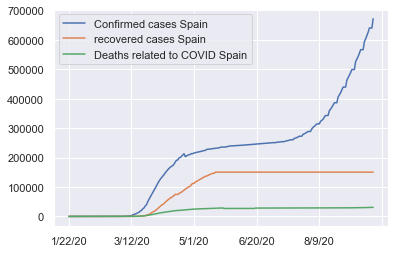

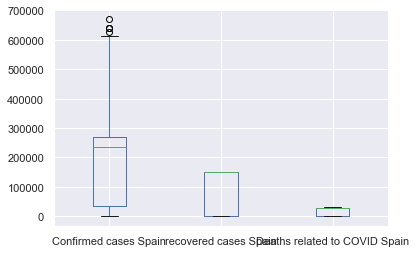

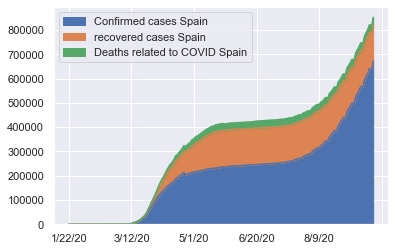

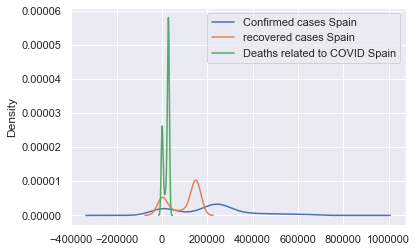

In [496]:
Data_Spain.plot()
Data_Spain.plot.box()
Data_Spain.plot.area()
Data_Spain.plot.density()

# Confirmed cases - Spain 

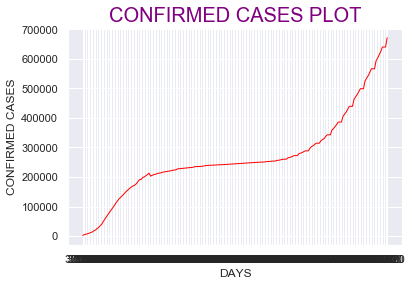

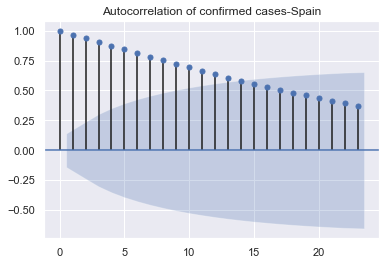

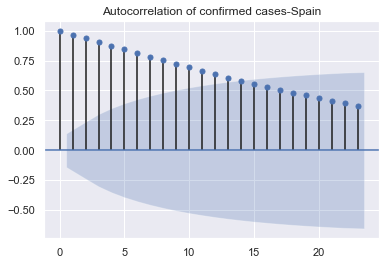

In [290]:
plt.plot(covid_confirmed_Spain.iloc[50:],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_confirmed_Spain.iloc[50:],title='Autocorrelation of confirmed cases-Spain')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 2860.8284501423987
Predictions confirmed cases: [368592.18638218 376080.9885727  384972.82529643 386020.25327561
 392260.37184697 404833.22542792 410692.8105436  414858.68995284
 424015.3581372  431790.42541611 435373.47303327 442879.77524781
 454005.42970848 459213.23549444 464906.73446194 473946.94597591
 481714.80993226 486313.86689404 494927.75565212 504417.078043
 510169.73073178 516618.72131655 525928.68805157 533232.38301373
 539119.16939476 547859.19321524 556728.57699531 562810.64169602
 570215.87188088 579292.36339507 586650.98737463 593310.74084737
 602251.91716398 610638.63544417 617342.02172793 625293.59380978
 634281.2335262  641700.30000988 649100.641419   658043.00096386]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

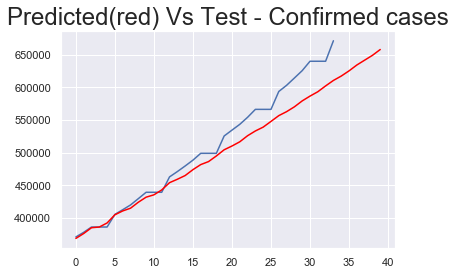

In [291]:
X_Spain_confirmed = np.asarray(covid_confirmed_Spain.iloc[50:])
train_Spain_confirmed = X_Spain_confirmed[0:160]
test_Spain_confirmed = X_Spain_confirmed[160:]
predictions_Spain_confirmed = []
model_arima_Spain_confirmed = ARIMA(train_Spain_confirmed,order=(10,2,1))
model_arima_fit_Spain_confirmed = model_arima_Spain_confirmed.fit()
print('AIC SCORE:',model_arima_fit_Spain_confirmed.aic)
predictions_Spain_confirmed = model_arima_fit_Spain_confirmed.forecast(steps=40)[0]
print('Predictions confirmed cases:',predictions_Spain_confirmed)

plt.plot(test_Spain_confirmed)
plt.plot(predictions_Spain_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)

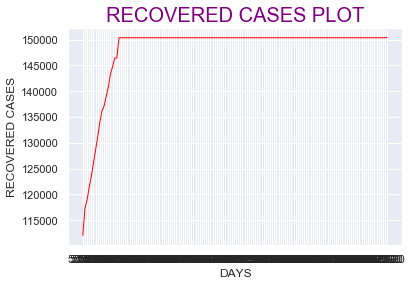

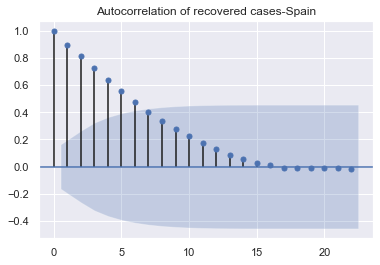

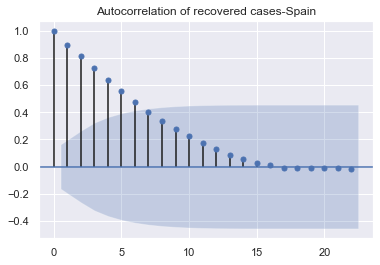

In [499]:
plt.plot(covid_recovered_Spain.iloc[100:],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_recovered_Spain.iloc[100:],title='Autocorrelation of recovered cases-Spain')


# ARIMA model - recovered cases - Spain
- (p,d,q) was iterated manually by trail and error.
- Best fit parameter for ARIMA was 3,2,0

AIC SCORE: 1229.209490030889
Predictions recovered cases: [150259.65343884 150135.75933853 149965.63640534 149767.40895427
 149506.82691979 149219.70011986 148884.73061202 148514.47222277
 148096.13397204 147642.36380673 147143.85154847 146606.9470676
 146026.31000099 145406.76722011 144744.46608001 144042.27144724
 143297.89472985 142513.27834988 141686.83867908 140819.80876423
 139911.21068598 138961.84760693 137971.06481192 136939.38318343
 135866.38799668 134752.41503073 133597.19186506 132400.93712261
 131163.47591455 129884.94910653 128565.24286674 127204.44880528
 125802.4934065  124359.43580122 122875.22831891 121349.90934567
 119783.44802549 118175.86917412 116527.15280844 114837.31501778
 113106.3428592  111334.24674406 109521.01829254 107666.66425018
 105771.17918901 103834.56747614 101856.82559718  99837.9563807
  97777.95755042  95676.83093794  93534.57506937  91351.19113087
  89126.67816786  86861.0369485   84554.26685464  82206.36838374
  79817.34113546  77387.18543197  

Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

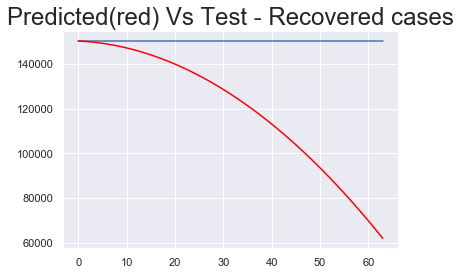

In [505]:
X_Spain_recovered = np.asarray(covid_recovered_Spain.iloc[100:])
train_Spain_recovered = X_Spain_recovered[:80]
test_Spain_recovered = X_Spain_recovered[80:]
predictions_Spain_recovered = []
model_arima_Spain_recovered = ARIMA(train_Spain_recovered,order=(3,2,0))
model_arima_fit_Spain_recovered = model_arima_Spain_recovered.fit()
print('AIC SCORE:',model_arima_fit_Spain_recovered.aic)
predictions_Spain_recovered = model_arima_fit_Spain_recovered.forecast(steps=64)[0]
print('Predictions recovered cases:',predictions_Spain_recovered)

plt.plot(test_Spain_recovered)
plt.plot(predictions_Spain_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)

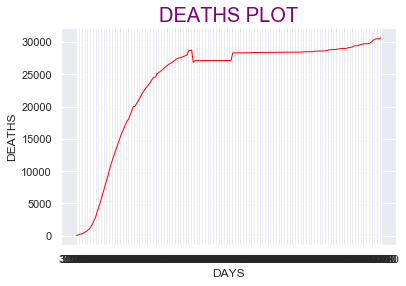

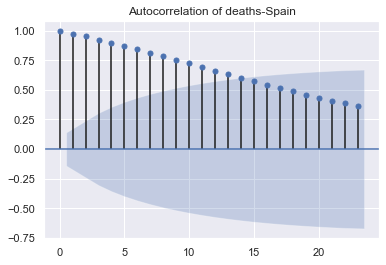

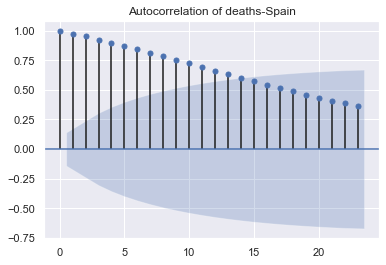

In [294]:
plt.plot(covid_deaths_Spain.iloc[50:],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_Spain.iloc[50:],title='Autocorrelation of deaths-Spain')

# ARIMA model - deaths - Spain

AIC SCORE: 2451.5772288294634
Predictions deaths cases: [29602.03496451 29696.20844097 29780.73219592 29888.40422646
 30005.50190634 30124.91432838 30246.96105633 30372.13575779
 30501.1794126  30630.60782961 30748.96193582 30862.78684499
 30969.97378814 31071.7018755 ]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

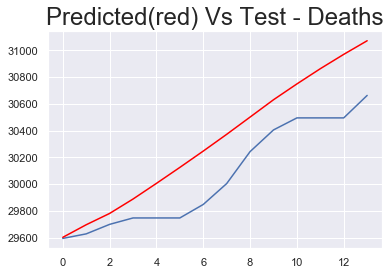

In [295]:
X_Spain_deaths = np.asarray(covid_deaths_Spain.iloc[50:])
train_Spain_deaths = X_Spain_deaths[0:180]
test_Spain_deaths = X_Spain_deaths[180:]
predictions_Spain_deaths = []
model_arima_Spain_deaths = ARIMA(train_Spain_deaths,order=(15,2,2))
model_arima_fit_Spain_deaths = model_arima_Spain_deaths.fit()
print('AIC SCORE:',model_arima_fit_Spain_deaths.aic)
predictions_Spain_deaths = model_arima_fit_Spain_deaths.forecast(steps=14)[0]
print('Predictions deaths cases:',predictions_Spain_deaths)

plt.plot(test_Spain_deaths)
plt.plot(predictions_Spain_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

# 7. Brazil

In [512]:
# To find index of Brazil in the dataset -

i = covid_confirmed[covid_confirmed['Country/Region']=='Brazil']
print(i)
i = covid_recovered[covid_recovered['Country/Region']=='Brazil']
print(i)
i = covid_deaths[covid_deaths['Country/Region']=='Brazil']
print(i)
# Finding the Brazil's index in dataframe
# Index 30 is Brazil.

   Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
30         Brazil        0        0        0        0        0        0   

    1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
30        0        0        0  ...  4315687  4330455  4345610  4382263   

    9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
30  4419083  4455386  4495183  4528240  4544629  4558040  

[1 rows x 245 columns]
   Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
30         Brazil        0        0        0        0        0        0   

    1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
30        0        0        0  ...  3723206  3723206  3770138  3811505   

    9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
30  3845464  3873934  3897539  3936893  3963446  3993432  

[1 rows x 245 columns]
   Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
30         Brazil        0        0      

In [297]:
covid_confirmed_Brazil = pd.DataFrame(covid_confirmed.iloc[30,1:246]).rename(columns={30:'Confirmed cases Brazil'},inplace=False)
covid_recovered_Brazil = pd.DataFrame(covid_recovered.iloc[30,1:246]).rename(columns={30:'recovered cases Brazil'},inplace=False)
covid_deaths_Brazil    = pd.DataFrame(covid_deaths.iloc[30,1:246]).rename(columns={30:'Deaths related to COVID Brazil'},inplace=False)

In [298]:
# Putting all 3 aspects of COVID cases into a single dataset -

Data_Brazil = pd.concat([covid_confirmed_Brazil,covid_recovered_Brazil,covid_deaths_Brazil],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_Brazil

,Confirmed cases Brazil,recovered cases Brazil,Deaths related to COVID Brazil
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,4455386,3873934,134935
9/18/20,4495183,3897539,135793
9/19/20,4528240,3936893,136532
9/20/20,4544629,3963446,136895


# E.D.A -

In [299]:
print('Shape of dataset:', Data_Brazil.shape)

print('check for Nan values:', Data_Brazil.isnull().sum())

print('EDA:', pd.DataFrame(Data_Brazil.describe()))

print('datatype:',Data_Brazil.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases Brazil            0
recovered cases Brazil            0
Deaths related to COVID Brazil    0
dtype: int64
EDA:        Confirmed cases Brazil  recovered cases Brazil  \
count            2.440000e+02            2.440000e+02   
mean             1.198699e+06            9.094629e+05   
std              1.491702e+06            1.251495e+06   
min              0.000000e+00            0.000000e+00   
25%              1.829500e+03            2.000000e+00   
50%              3.391440e+05            1.390085e+05   
75%              2.242504e+06            1.599060e+06   
max              4.558040e+06            3.993432e+06   

       Deaths related to COVID Brazil  
count                      244.000000  
mean                     42547.413934  
std                      46962.850022  
min                          0.000000  
25%                         31.750000  
50%                      21530.500000  
75%                      83098.

# Visualizations - Confirmed, deaths and recovered cases
- Line plot
- Area plot
- Density plot
- Box plot

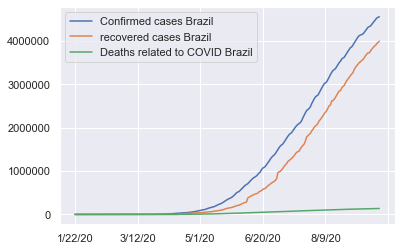

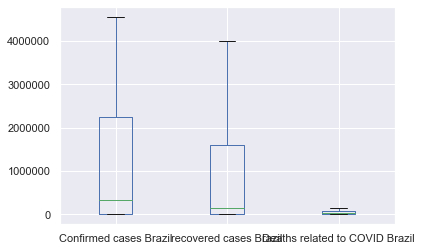

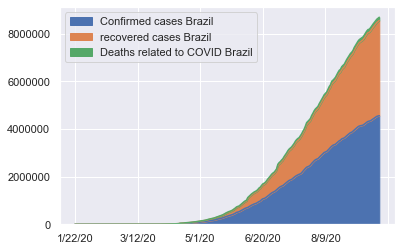

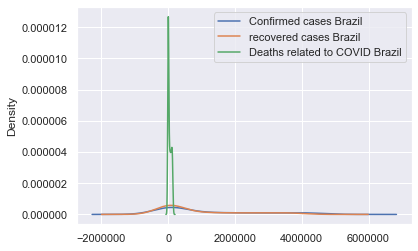

In [300]:
Data_Brazil.plot()
Data_Brazil.plot.box()
Data_Brazil.plot.area()
Data_Brazil.plot.density()


# Confirmed cases - Brazil :

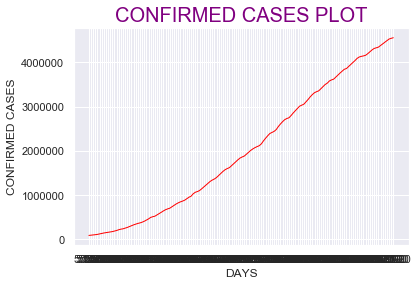

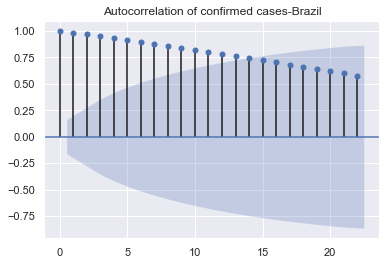

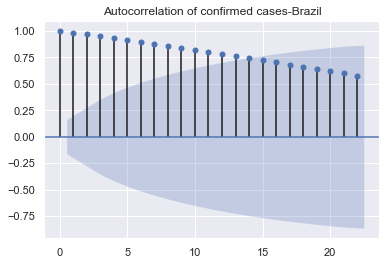

In [301]:
plt.plot(covid_confirmed_Brazil.iloc[100:],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

#Checking stationarity using ACF plots-

plot_acf(covid_confirmed_Brazil.iloc[100:],title='Autocorrelation of confirmed cases-Brazil')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

# ARIMA model for confirmed cases - Brazil

AIC SCORE: 823.6903158180528
Predictions confirmed cases: [3839649.4355791  3857535.58821423 3887583.19207381 3929367.82365882
 3971508.27290671 4012960.98487331 4053605.84597925 4079754.23926817
 4102604.51131314 4135011.55894225 4173126.54461436 4211222.27925184
 4251570.28063425 4284999.49151338 4309171.40449808 4334797.51689265
 4367012.89630193 4401228.5679508  4438016.4728299  4474023.67265416
 4502566.27490715 4526407.87064071 4553300.7201392  4583276.06052648
 4615606.93068464]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

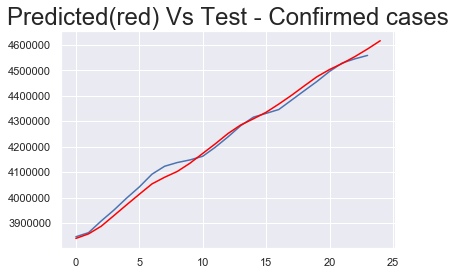

In [302]:
X_Brazil_confirmed = np.asarray(covid_confirmed_Brazil.iloc[180:245])
train_Brazil_confirmed = X_Brazil_confirmed[0:40]
test_Brazil_confirmed = X_Brazil_confirmed[40:]
predictions_Brazil_confirmed = []
model_arima_Brazil_confirmed = ARIMA(train_Brazil_confirmed,order=(5,2,0))
model_arima_fit_Brazil_confirmed = model_arima_Brazil_confirmed.fit()
print('AIC SCORE:',model_arima_fit_Brazil_confirmed.aic)
predictions_Brazil_confirmed = model_arima_fit_Brazil_confirmed.forecast(steps=25)[0]
print('Predictions confirmed cases:',predictions_Brazil_confirmed)

plt.plot(test_Brazil_confirmed)
plt.plot(predictions_Brazil_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)

# Recovered cases - Brazil :

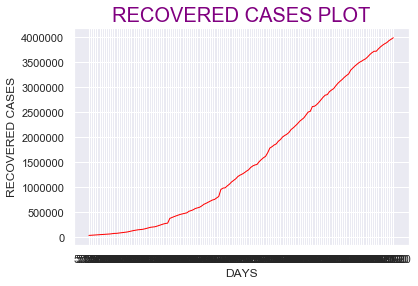

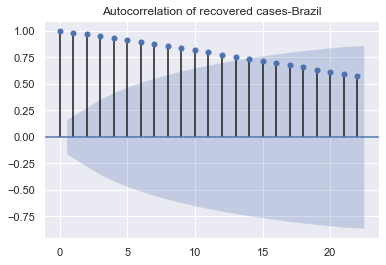

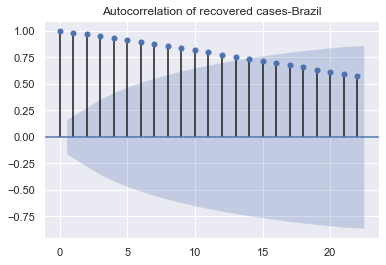

In [303]:
plt.plot(covid_recovered_Brazil.iloc[100:],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_recovered_Brazil.iloc[100:],title='Autocorrelation of recovered cases-Brazil')


# ARIMA Model - Recovered cases - Italy :

- p,q,d was chosen on a trail and basis method.
- Based on best fit between predicted and test data, (10,2,0) was chosen as best parameters.

AIC SCORE: 2222.270126242596
Predictions recovered cases: [2366738.7704057  2406510.36330873 2448447.40779707 2493995.77217583
 2539848.70974602 2584228.45983293 2630009.52131802 2676096.49415156
 2723446.46021098 2770295.75695381 2817389.70007078 2865161.21792972
 2913440.77092399 2962079.88306004 3011135.86012496 3060653.20423311
 3110592.72757617 3160990.66591316 3211710.10897017 3262893.71406966
 3314489.11936764 3366504.04185708 3418944.31848036 3471808.05216894
 3525094.21313866 3578803.37972377 3632928.95066662 3687471.33081552
 3742438.99626904 3797822.51484753 3853628.89165376 3909855.67988075
 3966503.3579911  4023572.15416799 4081061.20064291 4138970.24421568
 4197300.0468552  4256050.22821659 4315220.64157206 4374811.92605341
 4434823.53107196 4495255.84415528 4556108.66389022 4617381.93593427
 4679075.73199643]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

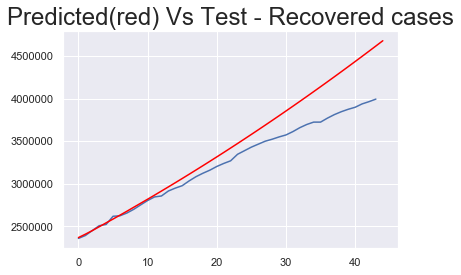

In [304]:
X_Brazil_recovered = np.asarray(covid_recovered_Brazil.iloc[100:])
train_Brazil_recovered = X_Brazil_recovered[0:100]
test_Brazil_recovered = X_Brazil_recovered[100:]
predictions_Brazil_recovered = []
model_arima_Brazil_recovered = ARIMA(train_Brazil_recovered,order=(10,2,0))
model_arima_fit_Brazil_recovered = model_arima_Brazil_recovered.fit()
print('AIC SCORE:',model_arima_fit_Brazil_recovered.aic)
predictions_Brazil_recovered = model_arima_fit_Brazil_recovered.forecast(steps=45)[0]
print('Predictions recovered cases:',predictions_Brazil_recovered)

plt.plot(test_Brazil_recovered)
plt.plot(predictions_Brazil_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)

# Deaths - Brazil

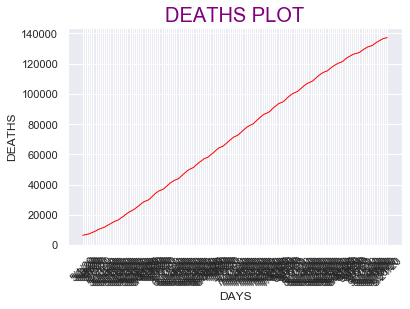

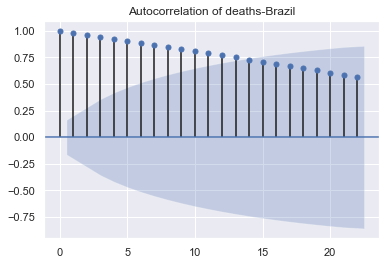

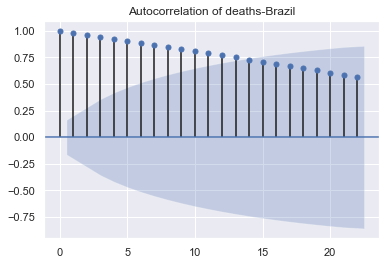

In [333]:
plt.plot(covid_deaths_Brazil.iloc[100:],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.xticks(rotation=45)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_Brazil.iloc[100:],title='Autocorrelation of deaths-Brazil')

# ARIMA model - Deaths - Brazil

AIC SCORE: 1288.6862306018572
Predictions deaths cases: [100985.33620428 101589.6238702  102757.48890092 104192.33383649
 105451.19844619 106542.40027716 107426.96348885 107968.19855633
 108619.31529275 109816.78980089 111269.76875404 112561.6643356
 113664.61222782 114538.49871249 115110.83454347 115812.50955434
 117038.94330443 118513.63223833 119835.06842229 120949.08449353
 121816.28598155 122419.00768937 123170.25873797 124426.60318126
 125923.79821087 127272.67007864 128396.22875179 129260.44504577
 129892.87647844 130692.80692907 131979.85307012 133500.16143703
 134874.34719693 136006.52029047 136870.5765367  137532.64342886
 138380.14223754 139698.80696763 141242.48161733 142640.10384022
 143780.20304394 144646.49194107 145338.32546431 146232.38663863
 147583.44989093]


C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

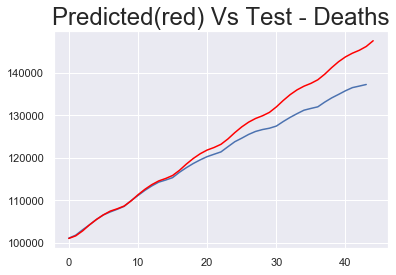

In [306]:
X_Brazil_deaths = np.asarray(covid_deaths_Brazil.iloc[100:])
train_Brazil_deaths = X_Brazil_deaths[0:100]
test_Brazil_deaths = X_Brazil_deaths[100:]
predictions_Brazil_deaths = []
model_arima_Brazil_deaths = ARIMA(train_Brazil_deaths,order=(10,2,0))
model_arima_fit_Brazil_deaths = model_arima_Brazil_deaths.fit()
print('AIC SCORE:',model_arima_fit_Brazil_deaths.aic)
predictions_Brazil_deaths = model_arima_fit_Brazil_deaths.forecast(steps=45)[0]
print('Predictions deaths cases:',predictions_Brazil_deaths)

plt.plot(test_Brazil_deaths)
plt.plot(predictions_Brazil_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

# 8.Italy :

In [528]:
#To find index of Italy in the dataset -

i = covid_confirmed[covid_confirmed['Country/Region']=='Italy']
print(i)
i = covid_recovered[covid_recovered['Country/Region']=='Italy']
print(i)
i = covid_deaths[covid_deaths['Country/Region']=='Italy']
print(i)

# Finding the Italy's index in dataframe
# Index 149 is Brazil.

    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
149          Italy        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
149        0        0        0  ...   286297   287753   288761   289990   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
149   291442   293025   294932   296569   298156   299506  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
136          Italy        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
136        0        0        0  ...   213191   213634   213950   214645   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
136   215265   215954   216807   217716   218351   218703  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
149          Italy        0 

In [529]:
# All 3 dataset for Italy :

covid_confirmed_Italy = pd.DataFrame(covid_confirmed.iloc[149,1:246]).rename(columns={149:'Confirmed cases Italy'},inplace=False)
covid_recovered_Italy = pd.DataFrame(covid_recovered.iloc[136,1:246]).rename(columns={136:'recovered cases Italy'},inplace=False)
covid_deaths_Italy    = pd.DataFrame(covid_deaths.iloc[149,1:246]).rename(columns={149:'Deaths related to COVID Italy'},inplace=False)

In [530]:
# Putting all 3 aspects of COVID cases into a single dataset -

Data_Italy = pd.concat([covid_confirmed_Italy,covid_recovered_Italy,covid_deaths_Italy],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_Italy

,Confirmed cases Italy,recovered cases Italy,Deaths related to COVID Italy
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,293025,215954,35658
9/18/20,294932,216807,35668
9/19/20,296569,217716,35692
9/20/20,298156,218351,35707


# E.D.A - Exploratory data analysis :

In [531]:
print('Shape of dataset:', Data_Italy.shape)

print('check for Nan values:', Data_Italy.isnull().sum())

print('EDA:', pd.DataFrame(Data_Italy.describe()))

print('datatype:',Data_Italy.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases Italy            0
recovered cases Italy            0
Deaths related to COVID Italy    0
dtype: int64
EDA:        Confirmed cases Italy  recovered cases Italy  \
count             244.000000             244.000000   
mean           170618.381148          111719.340164   
std            103808.313341           87049.415075   
min                 0.000000               0.000000   
25%             62729.750000            7024.000000   
50%            228992.500000          137780.000000   
75%            245108.500000          197681.500000   
max            299506.000000          218703.000000   

       Deaths related to COVID Italy  
count                     244.000000  
mean                    23323.430328  
std                     14601.727799  
min                         0.000000  
25%                      5926.750000  
50%                     32675.500000  
75%                     35084.500000  
max                 

# Visualizations combining confirmed, recovered and deaths :

- Line plot
- Box plot
- Area plot
- Density plot

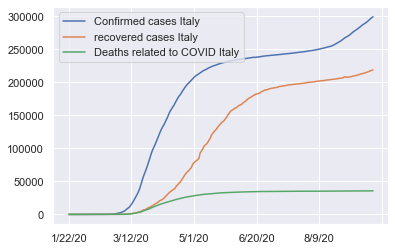

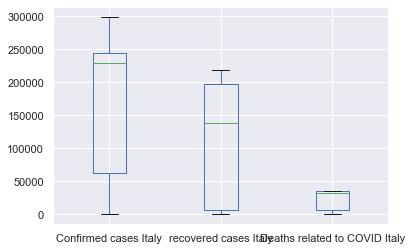

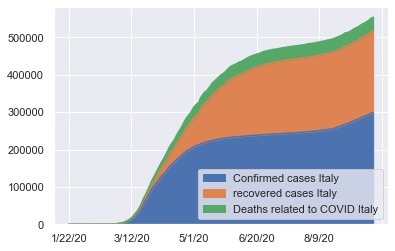

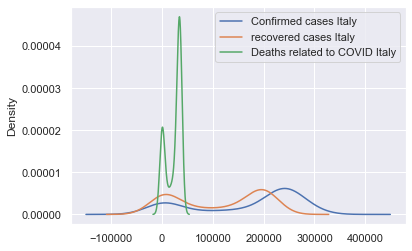

In [532]:
Data_Italy.plot()
Data_Italy.plot.box()
Data_Italy.plot.area()
Data_Italy.plot.density()

# Confirmed cases - Italy :

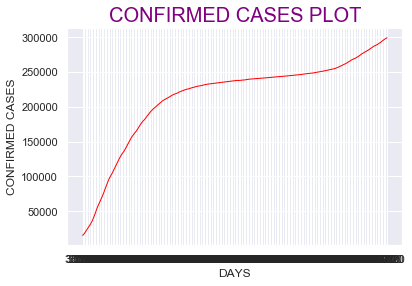

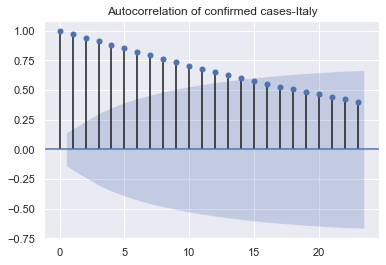

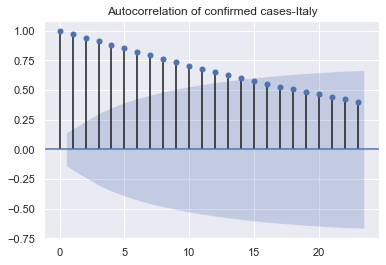

In [312]:
plt.plot(covid_confirmed_Italy.iloc[50:],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

#Checking stationarity using ACF plots-

plot_acf(covid_confirmed_Italy.iloc[50:],title='Autocorrelation of confirmed cases-Italy')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 2125.8502797003057
Predictions confirmed cases: [250417.08731523 250726.75016285 251092.25994122 251609.52972488
 252211.26696347 252804.60132383 253351.17908921 253801.49169283
 254325.52123175 254931.62678709 255654.86696739 256459.24406085
 257239.15028012 257974.76207012 258689.30700829 259459.27809922
 260355.63952019 261340.75092065 262383.35581224 263412.10539115
 264405.45646357 265418.18041478 266506.7206932  267711.13543431
 269005.11722391 270329.14686633 271649.71960263 272958.85801732
 274308.48630889 275752.39075878 277301.47436447 278927.79735785
 280578.5592149  282229.13183396 283895.49864407 285619.63221891
 287443.95229952 289366.52357095 291351.88645596 293361.18403962
 295380.36896569 297434.52867778 299562.62277596 301789.61604788
 304106.5291835 ]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

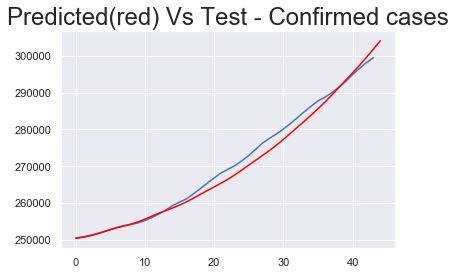

In [313]:
X_Italy_confirmed = np.asarray(covid_confirmed_Italy.iloc[50:])
train_Italy_confirmed = X_Italy_confirmed[0:150]
test_Italy_confirmed = X_Italy_confirmed[150:]
predictions_Italy_confirmed = []
model_arima_Italy_confirmed = ARIMA(train_Italy_confirmed,order=(10,2,1))
model_arima_fit_Italy_confirmed = model_arima_Italy_confirmed.fit()
print('AIC SCORE:',model_arima_fit_Italy_confirmed.aic)
predictions_Italy_confirmed = model_arima_fit_Italy_confirmed.forecast(steps=45)[0]
print('Predictions confirmed cases:',predictions_Italy_confirmed)

plt.plot(test_Italy_confirmed)
plt.plot(predictions_Italy_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)

# Recovered Cases - Italy :

- Check for stationarity in data using line plot of the data.
- Check for stationarity using ACF plot.

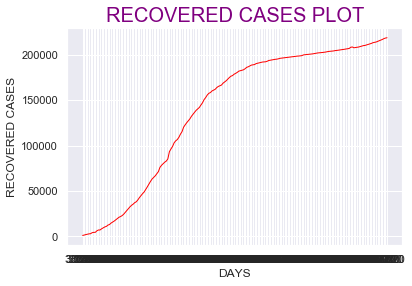

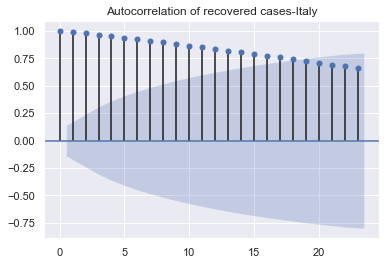

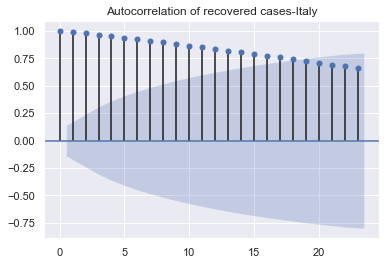

In [534]:
plt.plot(covid_recovered_Italy.iloc[50:],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_recovered_Italy.iloc[50:],title='Autocorrelation of recovered cases-Italy')


# ARIMA Model - Recovered cases - Italy :

AIC SCORE: 2802.83165358523
Predictions recovered cases: [208238.11165582 208513.92746632 208880.34278348 209242.19007426
 209679.90285661 210181.45786692 210718.24433411 211299.55820955
 211924.26971894 212583.91819799 213277.08266633 214002.1223287
 214755.59773301 215535.28702468 216339.36691164 217165.7568374
 218012.64452412 218878.44954433]
Test data-recovered cases-Italy: [[208490]
 [209027]
 [209610]
 [210015]
 [210238]
 [210801]
 [211272]
 [211885]
 [212432]
 [213191]
 [213634]
 [213950]
 [214645]
 [215265]
 [215954]
 [216807]
 [217716]
 [218351]
 [218703]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

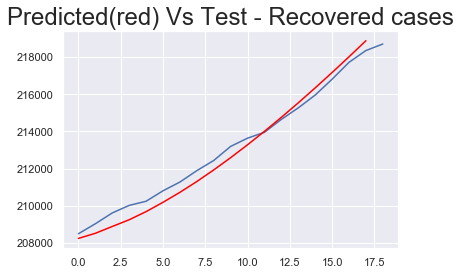

In [539]:
X_Italy_recovered = np.asarray(covid_recovered_Italy.iloc[50:])
train_Italy_recovered = X_Italy_recovered[0:175]
test_Italy_recovered = X_Italy_recovered[175:]
predictions_Italy_recovered = []
model_arima_Italy_recovered = ARIMA(train_Italy_recovered,order=(4,1,0))
model_arima_fit_Italy_recovered = model_arima_Italy_recovered.fit()
print('AIC SCORE:',model_arima_fit_Italy_recovered.aic)
predictions_Italy_recovered = model_arima_fit_Italy_recovered.forecast(steps=18)[0]
print('Predictions recovered cases:',predictions_Italy_recovered)
print('Test data-recovered cases-Italy:',test_Italy_recovered)

plt.plot(test_Italy_recovered)
plt.plot(predictions_Italy_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)

# Deaths related to COVID - Italy :

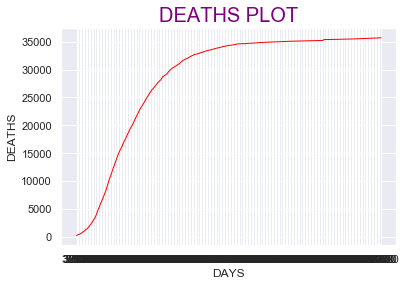

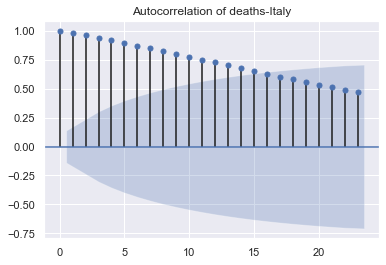

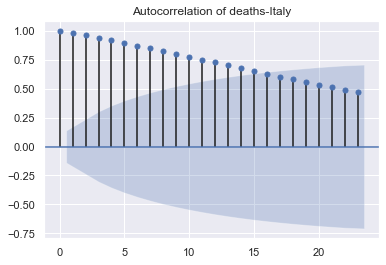

In [316]:
plt.plot(covid_deaths_Italy.iloc[45:],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_Italy.iloc[45:],title='Autocorrelation of deaths-Italy')

# ARIMA Model - COVID related deaths - Italy

AIC SCORE: 1222.080156806589
Predictions deaths cases: [35481.97791102 35492.44640519 35503.47055098 35515.0478875
 35527.17596477 35539.85234364 35553.07459577 35566.84030357
 35581.14706017 35595.99246935 35611.3741455  35627.28971359
 35643.73680909 35660.71307795 35678.21617655 35696.24377164
 35714.79354031 35733.86316995 35753.45035816 35773.55281277
 35794.16825174 35815.29440315 35836.92900514]
Test data-deaths cases-Italy: [[35473]
 [35477]
 [35483]
 [35491]
 [35497]
 [35507]
 [35518]
 [35534]
 [35541]
 [35553]
 [35563]
 [35577]
 [35587]
 [35597]
 [35603]
 [35610]
 [35624]
 [35633]
 [35645]
 [35658]
 [35668]
 [35692]
 [35707]
 [35724]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

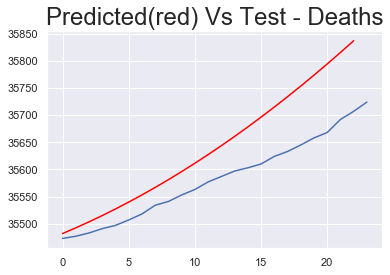

In [540]:
X_Italy_deaths = np.asarray(covid_deaths_Italy.iloc[100:])
train_Italy_deaths = X_Italy_deaths[0:120]
test_Italy_deaths = X_Italy_deaths[120:]
predictions_Italy_deaths = []
model_arima_Italy_deaths = ARIMA(train_Italy_deaths,order=(1,1,2))
model_arima_fit_Italy_deaths = model_arima_Italy_deaths.fit()
print('AIC SCORE:',model_arima_fit_Italy_deaths.aic)
predictions_Italy_deaths = model_arima_fit_Italy_deaths.forecast(steps=23)[0]
print('Predictions deaths cases:',predictions_Italy_deaths)
print('Test data-deaths cases-Italy:',test_Italy_deaths)

plt.plot(test_Italy_deaths)
plt.plot(predictions_Italy_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

# 9. Costa Rica :

- All 3 aspects of COVID in a population was taken into consideration - Confirmed, recovered and deaths.

In [514]:
#To find index of Costa Rica in the dataset -

i = covid_confirmed[covid_confirmed['Country/Region']=='Costa Rica']
print(i)
i = covid_recovered[covid_recovered['Country/Region']=='Costa Rica']
print(i)

# Finding the Costa Rica's index in dataframe
# Index 93 is Costa Rica.

   Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
93     Costa Rica        0        0        0        0        0        0   

    1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
93        0        0        0  ...    55454    55454    57361    58137   

    9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
93    59516    60818    62374    63712    63712    65602  

[1 rows x 245 columns]
   Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
80     Costa Rica        0        0        0        0        0        0   

    1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
80        0        0        0  ...    20928    20928    21206    21536   

    9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
80    21752    22662    23160    23552    23552    25127  

[1 rows x 245 columns]


In [515]:
# All 3 dataset for Costa Rica :

covid_confirmed_CostaRica = pd.DataFrame(covid_confirmed.iloc[93,1:246]).rename(columns={93:'Confirmed cases CostaRica'},inplace=False)
covid_recovered_CostaRica = pd.DataFrame(covid_recovered.iloc[80,1:246]).rename(columns={80:'recovered cases CostaRica'},inplace=False)
covid_deaths_CostaRica    = pd.DataFrame(covid_deaths.iloc[93,1:246]).rename(columns={93:'Deaths related to COVID CostaRica'},inplace=False)

In [516]:
# Putting all 3 aspects of COVID cases into a single dataset -

Data_CostaRica = pd.concat([covid_confirmed_CostaRica,covid_recovered_CostaRica,covid_deaths_CostaRica],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_CostaRica

,Confirmed cases CostaRica,recovered cases CostaRica,Deaths related to COVID CostaRica
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,60818,22662,666
9/18/20,62374,23160,686
9/19/20,63712,23552,706
9/20/20,63712,23552,706


# E.D.A - Exploratory Data Analysis : Costa Rica

In [517]:
print('Shape of dataset:', Data_CostaRica.shape)

print('check for Nan values:', Data_CostaRica.isnull().sum())

print('EDA:', pd.DataFrame(Data_CostaRica.describe()))

print('datatype:',Data_CostaRica.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases CostaRica            0
recovered cases CostaRica            0
Deaths related to COVID CostaRica    0
dtype: int64
EDA:        Confirmed cases CostaRica  recovered cases CostaRica  \
count                 244.000000                 244.000000   
mean                 9975.299180                3537.016393   
std                 16758.205141                6204.740100   
min                     0.000000                   0.000000   
25%                   152.000000                   2.000000   
50%                   914.500000                 603.500000   
75%                 12553.000000                3353.500000   
max                 65602.000000               25127.000000   

       Deaths related to COVID CostaRica  
count                         244.000000  
mean                           97.733607  
std                           180.370557  
min                             0.000000  
25%                             2

# Visualization - Costa Rica

- Line plot
- Box plot
- Area plot
- Density plot

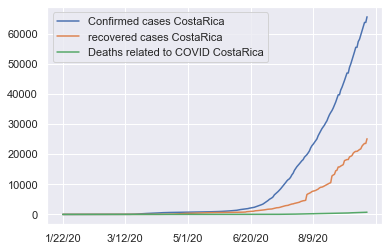

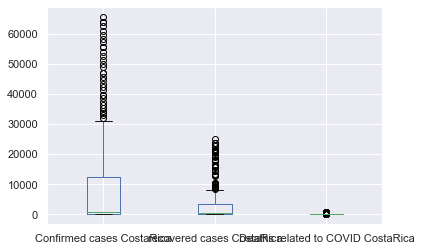

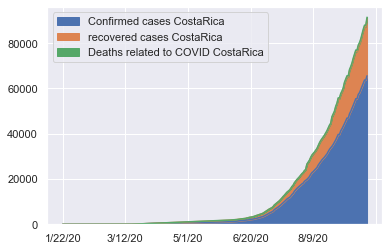

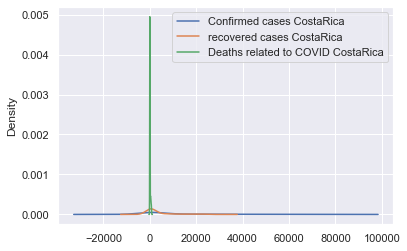

In [518]:
Data_CostaRica.plot()
Data_CostaRica.plot.box()
Data_CostaRica.plot.area()
Data_CostaRica.plot.density()

# Confirmed Cases - Costa Rica - An overview :

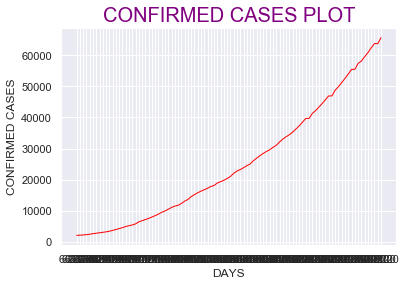

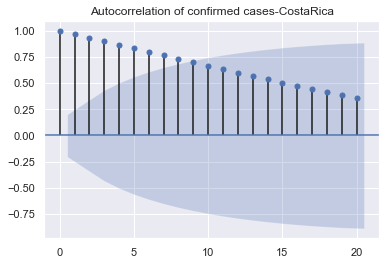

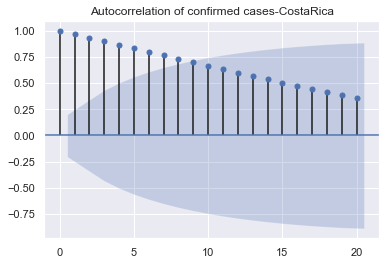

In [323]:
plt.plot(covid_confirmed_CostaRica.iloc[150:],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

#Checking stationarity using ACF plots-

plot_acf(covid_confirmed_CostaRica.iloc[150:],title='Autocorrelation of confirmed cases-CostaRica')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 879.5480174074382
Predictions confirmed cases: [39453.25183599 40352.95490704 41254.9133748  42187.10169163
 43201.53539279 44287.89192735 45378.81819117 46449.55670071
 47496.25521755 48536.5888418  49600.53836176 50701.92651713
 51834.09861044 52981.91288427 54131.59408195 55279.68816354
 56433.2139217  57601.92467279 58791.46432773 60000.92617394
 61224.93973728 62458.31885593 63699.38936066 64950.12816412
 66213.97733072]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

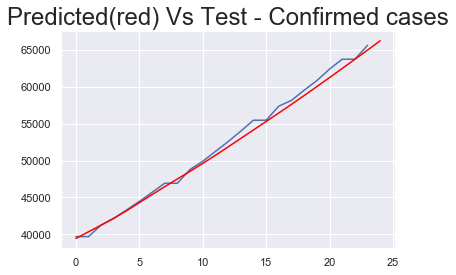

In [324]:
X_CostaRica_confirmed = np.asarray(covid_confirmed_CostaRica.iloc[150:])
train_CostaRica_confirmed = X_CostaRica_confirmed[0:70]
test_CostaRica_confirmed = X_CostaRica_confirmed[70:]
predictions_CostaRica_confirmed = []
model_arima_CostaRica_confirmed = ARIMA(train_CostaRica_confirmed,order=(5,2,1))
model_arima_fit_CostaRica_confirmed = model_arima_CostaRica_confirmed.fit()
print('AIC SCORE:',model_arima_fit_CostaRica_confirmed.aic)
predictions_CostaRica_confirmed = model_arima_fit_CostaRica_confirmed.forecast(steps=25)[0]
print('Predictions confirmed cases:',predictions_CostaRica_confirmed)

plt.plot(test_CostaRica_confirmed)
plt.plot(predictions_CostaRica_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)

# Recovered cases - Costa Rica - An overview :

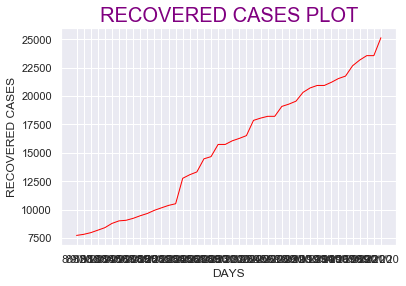

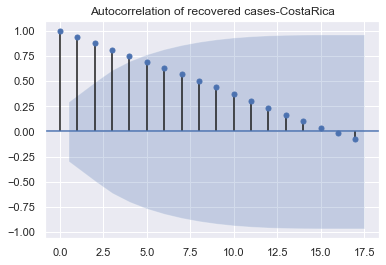

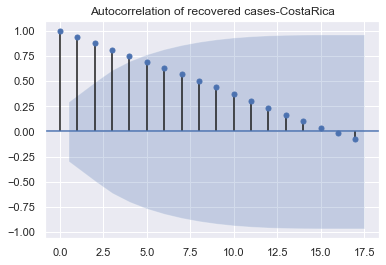

In [520]:
plt.plot(covid_recovered_CostaRica.iloc[200:245],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

#Checking stationarity using ACF plots-

plot_acf(covid_recovered_CostaRica.iloc[200:245],title='Autocorrelation of recovered cases-CostaRica')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

# ARIMA - Recovered cases - Costa Rica :

AIC SCORE: 451.09012125267395
Predictions recovered cases: [19678.07076291 19910.82483757 20264.09947001 20580.92662353
 21115.49540266 21536.56594265 21855.55320455 22247.49325384
 22622.17274826 23047.54023274 23435.50011444 23796.82739033
 24189.14841082 24572.12855379 24966.27716435]
Test data-recovered cases-CostaRica: [[19285]
 [19544]
 [20322]
 [20710]
 [20928]
 [20928]
 [21206]
 [21536]
 [21752]
 [22662]
 [23160]
 [23552]
 [23552]
 [25127]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

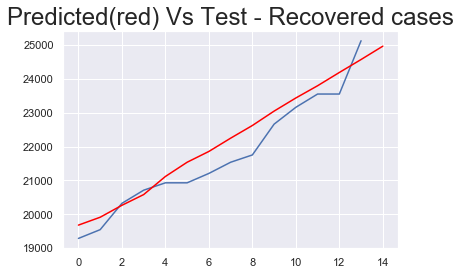

In [526]:
X_CostaRica_recovered = np.asarray(covid_recovered_CostaRica.iloc[200:])
train_CostaRica_recovered = X_CostaRica_recovered[0:30]
test_CostaRica_recovered = X_CostaRica_recovered[30:]
predictions_CostaRica_recovered = []
model_arima_CostaRica_recovered = ARIMA(train_CostaRica_recovered,order=(5,1,0))
model_arima_fit_CostaRica_recovered = model_arima_CostaRica_recovered.fit()
print('AIC SCORE:',model_arima_fit_CostaRica_recovered.aic)
predictions_CostaRica_recovered = model_arima_fit_CostaRica_recovered.forecast(steps=15)[0]
print('Predictions recovered cases:',predictions_CostaRica_recovered)
print('Test data-recovered cases-CostaRica:',test_CostaRica_recovered)

plt.plot(test_CostaRica_recovered)
plt.plot(predictions_CostaRica_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)

# Deaths related to COVID - Costa Rica - An overview :

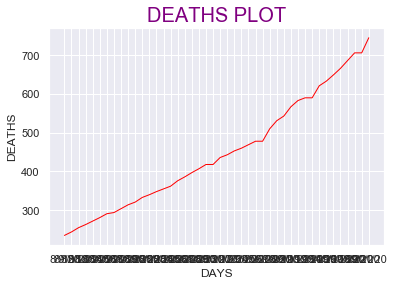

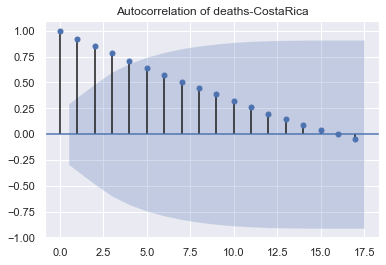

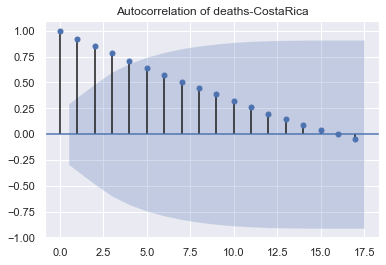

In [327]:
plt.plot(covid_deaths_CostaRica.iloc[200:],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_CostaRica.iloc[200:],title='Autocorrelation of deaths-CostaRica')

AIC SCORE: 176.4225548204115
Predictions deaths cases: [499.61164847 518.64630873 524.29732915 529.20907281 546.75963673
 544.23941187 565.14085902 563.48512194 580.51094602 584.79528708
 595.19899568 605.77784798 611.12660296 625.05675519]


C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

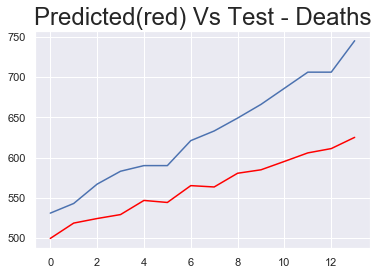

In [328]:
X_CostaRica_deaths = np.asarray(covid_deaths_CostaRica.iloc[200:])
train_CostaRica_deaths = X_CostaRica_deaths[0:30]
test_CostaRica_deaths = X_CostaRica_deaths[30:]
predictions_CostaRica_deaths = []
model_arima_CostaRica_deaths = ARIMA(train_CostaRica_deaths,order=(3,1,2))
model_arima_fit_CostaRica_deaths = model_arima_CostaRica_deaths.fit()
print('AIC SCORE:',model_arima_fit_CostaRica_deaths.aic)
predictions_CostaRica_deaths = model_arima_fit_CostaRica_deaths.forecast(steps=14)[0]
print('Predictions deaths cases:',predictions_CostaRica_deaths)

plt.plot(test_CostaRica_deaths)
plt.plot(predictions_CostaRica_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

# 10. IRELAND :-

# DATA COLLECTION :-

In [541]:
# To find index of Brazil in the dataset -

i = covid_confirmed[covid_confirmed['Country/Region']=='Ireland']
print(i)
i = covid_recovered[covid_recovered['Country/Region']=='Ireland']
print(i)
i = covid_deaths[covid_deaths['Country/Region']=='Ireland']
print(i)

# Finding the Ireland's index in dataframe
# Index  is Ireland.

    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
147        Ireland        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
147        0        0        0  ...    30730    30985    31192    31549   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
147    31799    32023    32271    32538    32933    33121  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
134        Ireland        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/12/20  9/13/20  9/14/20  9/15/20  \
134        0        0        0  ...    23364    23364    23364    23364   

     9/16/20  9/17/20  9/18/20  9/19/20  9/20/20  9/21/20  
134    23364    23364    23364    23364    23364    23364  

[1 rows x 245 columns]
    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
147        Ireland        0 

In [542]:
covid_confirmed_Ireland = pd.DataFrame(covid_confirmed.iloc[147,1:246]).rename(columns={147:'Confirmed cases Ireland'},inplace=False)
covid_recovered_Ireland = pd.DataFrame(covid_recovered.iloc[134,1:246]).rename(columns={134:'recovered cases Ireland'},inplace=False)
covid_deaths_Ireland    = pd.DataFrame(covid_deaths.iloc[147,1:246]).rename(columns={147:'Deaths related to COVID Ireland'},inplace=False)

In [547]:
# Putting all 3 aspects of COVID cases into a single dataset -

Data_Ireland = pd.concat([covid_confirmed_Ireland,covid_recovered_Ireland,covid_deaths_Ireland],axis=1).astype('int64')   #Type casted the data type from objects to integer
Data_Ireland

,Confirmed cases Ireland,recovered cases Ireland,Deaths related to COVID Ireland
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/17/20,32023,23364,1789
9/18/20,32271,23364,1792
9/19/20,32538,23364,1792
9/20/20,32933,23364,1792


# E.D.A :-

In [548]:
print('Shape of dataset:', Data_Ireland.shape)

print('check for Nan values:', Data_Ireland.isnull().sum())

print('EDA:', pd.DataFrame(Data_Ireland.describe()))

print('datatype:',Data_Ireland.dtypes)


Shape of dataset: (244, 3)
check for Nan values: Confirmed cases Ireland            0
recovered cases Ireland            0
Deaths related to COVID Ireland    0
dtype: int64
EDA:        Confirmed cases Ireland  recovered cases Ireland  \
count               244.000000               244.000000   
mean              17088.139344             13548.827869   
std               11883.476748             10794.773926   
min                   0.000000                 0.000000   
25%                1070.250000                 5.000000   
50%               24544.000000             21060.000000   
75%               25820.750000             23364.000000   
max               33121.000000             23364.000000   

       Deaths related to COVID Ireland  
count                       244.000000  
mean                       1071.331967  
std                         786.356803  
min                           0.000000  
25%                           5.500000  
50%                        1598.000000  
75%

# Visualizations - Confirmed, deaths and recovered cases
- Line plot
- Area plot
- Density plot
- Box plot

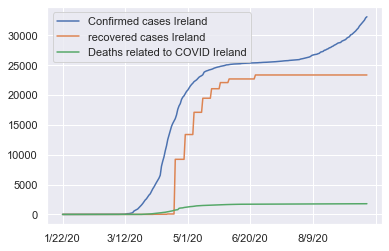

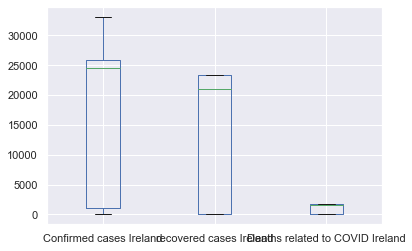

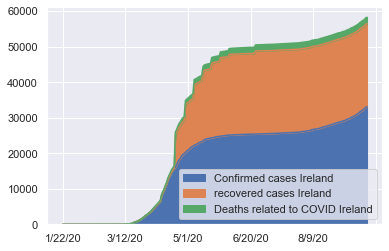

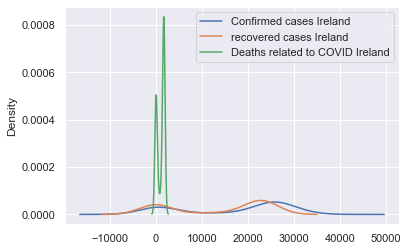

In [545]:
Data_Ireland.plot()
Data_Ireland.plot.box()
Data_Ireland.plot.area()
Data_Ireland.plot.density()

# Confirmed cases - Ireland :-

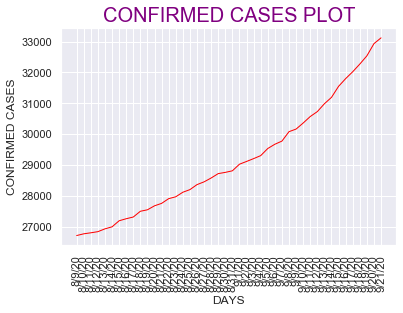

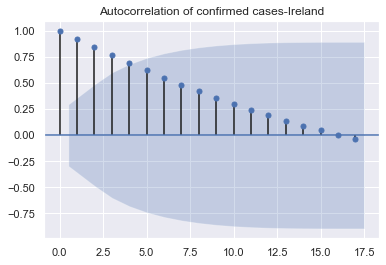

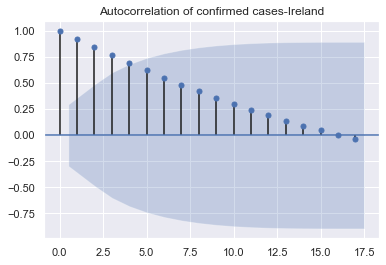

In [551]:
plt.plot(covid_confirmed_Ireland.iloc[200:245],linewidth=1,color='red')
plt.title('CONFIRMED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('CONFIRMED CASES')
plt.xticks(rotation=90)
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

#Checking stationarity using ACF plots-

plot_acf(covid_confirmed_Ireland.iloc[200:245],title='Autocorrelation of confirmed cases-Ireland')

#Even the ACF plot, which is undergoing a very gradual decay, is not a sign of Stationary data

AIC SCORE: 367.94367341271305
Predictions confirmed cases: [30928.17816841 31125.53981255 31326.50666831 31526.78720696
 31736.3161271  31951.0585532  32166.4685824  32387.97598965
 32614.52089716 32844.620413  ]
Test data-confirmed cases-Ireland: [[30985]
 [31192]
 [31549]
 [31799]
 [32023]
 [32271]
 [32538]
 [32933]
 [33121]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Confirmed cases')

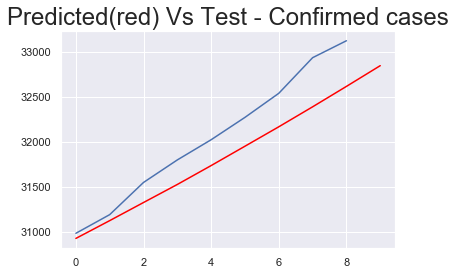

In [556]:
X_Ireland_confirmed = np.asarray(covid_confirmed_Ireland.iloc[200:245])
train_Ireland_confirmed = X_Ireland_confirmed[0:35]
test_Ireland_confirmed = X_Ireland_confirmed[35:]
predictions_Ireland_confirmed = []
model_arima_Ireland_confirmed = ARIMA(train_Ireland_confirmed,order=(4,2,0))
model_arima_fit_Ireland_confirmed = model_arima_Ireland_confirmed.fit()
print('AIC SCORE:',model_arima_fit_Ireland_confirmed.aic)
predictions_Ireland_confirmed = model_arima_fit_Ireland_confirmed.forecast(steps=10)[0]
print('Predictions confirmed cases:',predictions_Ireland_confirmed)
print('Test data-confirmed cases-Ireland:',test_Ireland_confirmed )

plt.plot(test_Ireland_confirmed)
plt.plot(predictions_Ireland_confirmed,color='red')
plt.title('Predicted(red) Vs Test - Confirmed cases',fontsize=24,)

# Recovered cases - Ireland :-

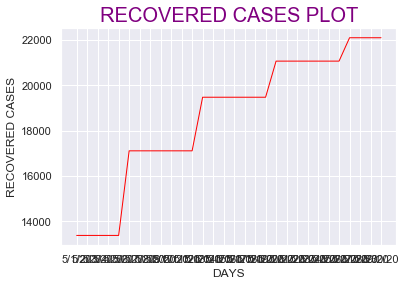

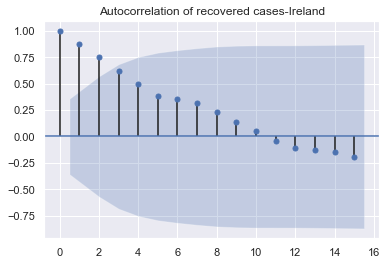

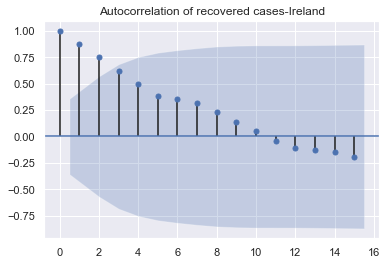

In [568]:
plt.plot(covid_recovered_Ireland.iloc[100:130],linewidth=1,color='red')
plt.title('RECOVERED CASES PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('RECOVERED CASES')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_recovered_Ireland.iloc[100:130],title='Autocorrelation of recovered cases-Ireland')


C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:224: RuntimeWarning: invalid value encountered in log
  Z_mat.astype(complex), R_mat, T_mat)
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalm

AIC SCORE: 357.38605586134116
Predictions recovered cases: [21324.6555724  21284.5704452  21229.51033981 21173.43342862
 22142.78645072 22085.85669946 21980.34459256 22044.81558149]
Test data-recovered cases-Ireland: [[21060]
 [21060]
 [21060]
 [21060]
 [22089]
 [22089]
 [22089]
 [22089]]


C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'Predicted(red) Vs Test - Recovered cases')

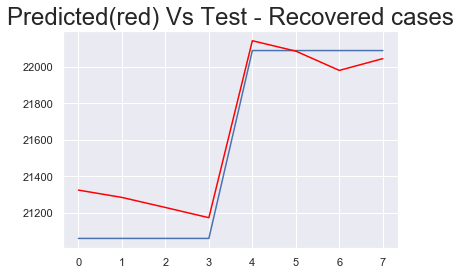

In [577]:
X_Ireland_recovered = np.asarray(covid_recovered_Ireland.iloc[100:130])
train_Ireland_recovered = X_Ireland_recovered[0:22]
test_Ireland_recovered = X_Ireland_recovered[22:]
predictions_Ireland_recovered = []
model_arima_Ireland_recovered = ARIMA(train_Ireland_recovered,order=(6,2,1))
model_arima_fit_Ireland_recovered = model_arima_Ireland_recovered.fit()
print('AIC SCORE:',model_arima_fit_Ireland_recovered.aic)
predictions_Ireland_recovered = model_arima_fit_Ireland_recovered.forecast(steps=8)[0]
print('Predictions recovered cases:',predictions_Ireland_recovered)
print('Test data-recovered cases-Ireland:',test_Ireland_recovered)

plt.plot(test_Ireland_recovered)
plt.plot(predictions_Ireland_recovered,color='red')
plt.title('Predicted(red) Vs Test - Recovered cases',fontsize=24,)

# Deaths - Ireland :-

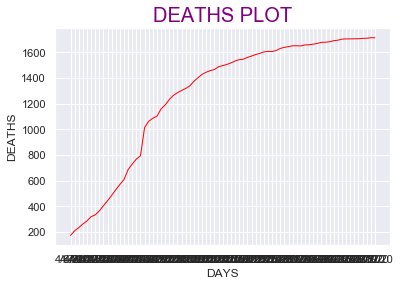

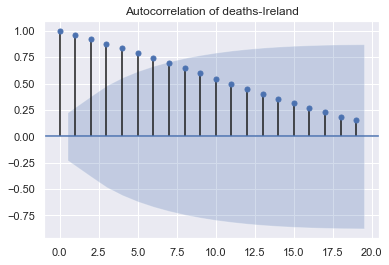

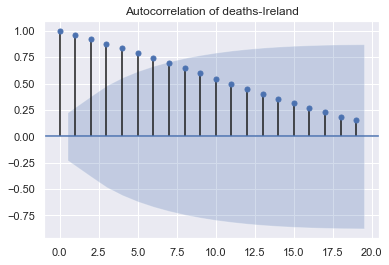

In [586]:
plt.plot(covid_deaths_Ireland.iloc[75:150],linewidth=1,color='red')
plt.title('DEATHS PLOT',fontsize=20,color='purple')
plt.xlabel('DAYS')
plt.ylabel('DEATHS')
plt.show()   #Graph doesn't look like a stationary one as the plot doesn't vary around the mean.

plot_acf(covid_deaths_Ireland.iloc[75:150],title='Autocorrelation of deaths-Ireland')

C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:224: RuntimeWarning: invalid value encountered in log
  Z_mat.astype(complex), R_mat, T_mat)
C:\Users\R BASKARAN\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalm

AIC SCORE: 666.2815752774072
Predictions deaths cases: [1663.18780765 1671.58237559 1669.26863291 1675.28800323 1675.46705779
 1682.13767595 1680.3778086  1686.32041407 1685.87610458 1690.71393189
 1689.97969453 1695.37860044 1694.66199744 1698.75530941 1698.56342905]
Test data-deaths cases-Ireland: [[1670]
 [1678]
 [1679]
 [1683]
 [1691]
 [1695]
 [1703]
 [1705]
 [1705]
 [1706]
 [1706]
 [1709]
 [1710]
 [1714]
 [1714]]


Text(0.5, 1.0, 'Predicted(red) Vs Test - Deaths')

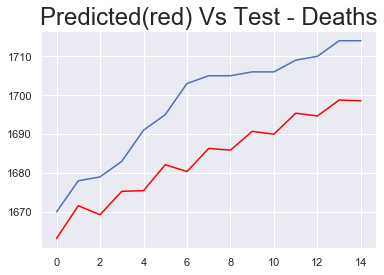

In [598]:
X_Ireland_deaths = np.asarray(covid_deaths_Ireland.iloc[75:150])
train_Ireland_deaths = X_Ireland_deaths[0:60]
test_Ireland_deaths = X_Ireland_deaths[60:]
predictions_Ireland_deaths = []
model_arima_Ireland_deaths = ARIMA(train_Ireland_deaths,order=(17,0,1))
model_arima_fit_Ireland_deaths = model_arima_Ireland_deaths.fit()
print('AIC SCORE:',model_arima_fit_Ireland_deaths.aic)
predictions_Ireland_deaths = model_arima_fit_Ireland_deaths.forecast(steps=15)[0]
print('Predictions deaths cases:',predictions_Ireland_deaths)
print('Test data-deaths cases-Ireland:',test_Ireland_deaths)

plt.plot(test_Ireland_deaths)
plt.plot(predictions_Ireland_deaths,color='red')
plt.title('Predicted(red) Vs Test - Deaths',fontsize=24,)

 # ....................................THE END........................................